<font color='Navy' size='6'> <b> Lending Club Case Study <b> </font>

In [1]:
###################################################################################################################################
##  
##  Program Name        : Lending Club Case Study
##
##  Description         : Using EDA, understand risk analytics in banking and financial services and understand how data is used 
##                        to minimise the risk of losing money while lending to customers.  
##
##  Author(s)           : Prachi Sharma
##                      : Chandan Kumar
##  
###################################################################################################################################

## Import Libraries and set required parameters 

In [2]:
import numpy as np
print('numpy version\t:',np.__version__)

import pandas as pd
print('pandas version\t:',pd.__version__)


import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats


import re
import chardet

import seaborn as sns
print('seaborn version\t:',sns.__version__)

#set it to None to remove SettingWithCopyWarning
pd.options.mode.chained_assignment = None 

#set it to convert scientific noations such as 4.225108e+11 to 422510842796.00
pd.options.display.float_format = '{:,.2f}'.format 

# To display all the columns
pd.set_option('display.max_columns', 130)

np.set_printoptions(suppress=True,formatter={'float_kind':'{:f}'.format})

import os
# if there are any warning due to version mismatch, it will be ignored
import warnings
warnings.filterwarnings('ignore') 

import platform
print('Python version\t:',platform.python_version())

numpy version	: 1.16.2
pandas version	: 0.24.2
seaborn version	: 0.9.0
Python version	: 3.7.3


## Data Sourcing 

In [3]:
#Reading Loan dataset Metadata
loan_description = pd.read_excel('https://cdn.upgrad.com/UpGrad/temp/af860da6-f838-47d6-ad97-551022550ee4/Data_Dictionary.xlsx').dropna()
loan_description.style.set_properties(subset=['Description'], **{'width': '1000px'})

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.


In [4]:
#Loading the dataset
loan = pd.read_csv('https://cdn.upgrad.com/UpGrad/temp/3ba74fb7-bd88-4854-8597-1c225a5aed99/loan.zip')

Text(0, 0.5, 'Data type')

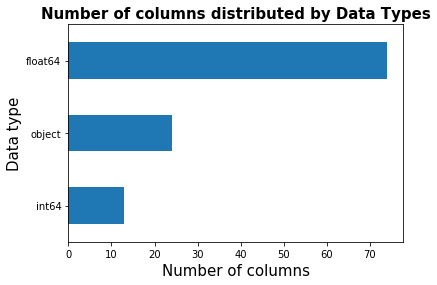

In [5]:
# Number of each type of column
loan.dtypes.value_counts().sort_values().plot(kind='barh')
plt.title('Number of columns distributed by Data Types',fontsize=15,weight='bold')
plt.xlabel('Number of columns',fontsize=15)
plt.ylabel('Data type',fontsize=15)

In [6]:
#Checking the shape of the dataframe
print("Shape of the Initial Loan Dataset is : ",loan.shape)

Shape of the Initial Loan Dataset is :  (39717, 111)


### Data Summarization

In [7]:
#Check overall statistics of Loan dataframe
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,"39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","14,035.00","2,786.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,661.00",0.00,"39,717.00",0.00,0.00,0.00,"39,717.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"39,661.00","39,717.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"39,020.00","39,678.00",0.00,0.00,0.00,0.00
mean,"683,131.91","850,463.56","11,219.44","10,947.71","10,397.45",324.56,"68,968.93",13.32,0.15,0.87,35.90,69.70,9.29,0.06,"13,382.53",22.09,51.23,50.99,"12,153.60","11,567.15","9,793.35","2,263.66",1.36,95.22,12.41,"2,678.83",0.00,nan,1.00,nan,nan,nan,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.04,0.00,nan,nan,nan,nan
std,"210,694.13","265,678.31","7,456.67","7,187.24","7,128.45",208.87,"63,793.77",6.68,0.49,1.07,22.02,43.82,4.40,0.24,"15,885.02",11.40,375.17,373.82,"9,042.04","8,942.67","7,065.52","2,608.11",7.29,688.74,148.67,"4,447.14",0.00,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.20,0.00,nan,nan,nan,nan
min,"54,734.00","70,699.00",500.00,500.00,0.00,15.69,"4,000.00",0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,1.00,nan,nan,nan,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
25%,"516,221.00","666,780.00","5,500.00","5,400.00","5,000.00",167.02,"40,404.00",8.17,0.00,0.00,18.00,22.00,6.00,0.00,"3,703.00",13.00,0.00,0.00,"5,576.93","5,112.31","4,600.00",662.18,0.00,0.00,0.00,218.68,0.00,nan,1.00,nan,nan,nan,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
50%,"665,665.00","850,812.00","10,000.00","9,600.00","8,975.00",280.22,"59,000.00",13.40,0.00,1.00,34.00,90.00,9.00,0.00,"8,850.00",20.00,0.00,0.00,"9,899.64","9,287.15","8,000.00","1,348.91",0.00,

In [8]:
#Check the Loan Dataframe Columns types and other Informations
loan.info(verbose=True, max_cols=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
id                                39717 non-null int64
member_id                         39717 non-null int64
loan_amnt                         39717 non-null int64
funded_amnt                       39717 non-null int64
funded_amnt_inv                   39717 non-null float64
term                              39717 non-null object
int_rate                          39717 non-null object
installment                       39717 non-null float64
grade                             39717 non-null object
sub_grade                         39717 non-null object
emp_title                         37258 non-null object
emp_length                        38642 non-null object
home_ownership                    39717 non-null object
annual_inc                        39717 non-null float64
verification_status               39717 non-null object
issue_d                           39717 non-null ob

In [9]:
#Lets have a look at original dataset
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,"4,975.00",36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,"24,000.00",Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,nan,nan,3,0,13648,83.70%,9,f,0.00,0.00,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
1,1077430,1314167,2500,2500,"2,500.00",60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,nan,nan,3,0,1687,9.40%,4,f,0.00,0.00,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
2,1077175,1313524,2400,2400,"2,400.00",36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,"12,252.00",Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,nan,nan,2,0,2956,98.50%,10,f,0.00,0.00,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
3,1076863,1277178,10000,10000,"10,000.00",36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,"49,200.00",Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,nan,10,0,5598,21%,37,f,0.00,0.00,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan

##  Data Cleaning and Manipulation
    - Data Cleaning 
    - Data Manipulation

### <font size='4' color='green'> Data Cleaning </font>

- Remove the columns which have higher percentage of missing values

In [10]:
#List missing value percentage of each column in loan dataframe
missing_values_columns = round(100*(loan.isnull().sum()/loan.shape[0]), 2)
missing_values_columns.loc[missing_values_columns > 0]

emp_title                          6.19
emp_length                         2.71
desc                              32.58
title                              0.03
mths_since_last_delinq            64.66
mths_since_last_record            92.99
revol_util                         0.13
last_pymnt_d                       0.18
next_pymnt_d                      97.13
last_credit_pull_d                 0.01
collections_12_mths_ex_med         0.14
mths_since_last_major_derog      100.00
annual_inc_joint                 100.00
dti_joint                        100.00
verification_status_joint        100.00
tot_coll_amt                     100.00
tot_cur_bal                      100.00
open_acc_6m                      100.00
open_il_6m                       100.00
open_il_12m                      100.00
open_il_24m                      100.00
mths_since_rcnt_il               100.00
total_bal_il                     100.00
il_util                          100.00
open_rv_12m                      100.00


- There are many columns where missing value percentage is more than 90%, lets remove those columns as these columns doesn't give any information in analysis

####  Treating Missing Values columns further more....

In [11]:
# creating the dataframe with columns having more than 90% missing values
missing_values_columns = loan.columns[100*(loan.isnull().sum()/loan.shape[0]) > 90]

missing_values_columns

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [12]:
# Removing the columns having more than 90% missing values

loan = loan.drop(missing_values_columns, axis=1)

In [13]:
# Percentage of missing values in each column after dropping more than 90% missing values

missing_values_columns = round(100*(loan.isnull().sum()/loan.shape[0]), 2)

missing_values_columns[missing_values_columns != 0]

emp_title                     6.19
emp_length                    2.71
desc                         32.58
title                         0.03
mths_since_last_delinq       64.66
revol_util                    0.13
last_pymnt_d                  0.18
last_credit_pull_d            0.01
collections_12_mths_ex_med    0.14
chargeoff_within_12_mths      0.14
pub_rec_bankruptcies          1.75
tax_liens                     0.10
dtype: float64

- Still there are columns like desc, mnths_since_last_delinq with ~33% and ~65% missing values respectively. Lets check whether they are relevant for any useful information

In [14]:
# Check for values of columns 'desc' and 'mths_since_last_delinq'

loan.loc[:,['desc','mths_since_last_delinq']].head()

,desc,mths_since_last_delinq
0,Borrower added on 12/22/11 > I need to upgra...,nan
1,Borrower added on 12/22/11 > I plan to use t...,nan
2,NaN,nan
3,Borrower added on 12/21/11 > to pay for prop...,35.00
4,Borrower added on 12/21/11 > I plan on combi...,38.00


The column 'desc' contains the loan description the applicants provide while applying for the loan. This doesn't seem to be much useful in inferring our target variable, hence we will not use this column in this analysis. 

Second col months since last delinquent represents the number of months passed since the person last fell into the delinquency group. This value will get generated months after the loan has been approved, and is not present at the time of loan application, hence it cannot be used as a predictor of default at the time of loan approval. 

Thus let's drop the two columns.

In [15]:
# Remove the columns 'desc' and 'mths_since_last_delinq'

loan.drop(['desc','mths_since_last_delinq'], axis = 1, inplace = True)

In [16]:
# Percentage of missing values after dropping columns

missing_values_columns = round(100*(loan.isnull().sum()/loan.shape[0]), 2)

missing_values_columns[missing_values_columns != 0]

emp_title                    6.19
emp_length                   2.71
title                        0.03
revol_util                   0.13
last_pymnt_d                 0.18
last_credit_pull_d           0.01
collections_12_mths_ex_med   0.14
chargeoff_within_12_mths     0.14
pub_rec_bankruptcies         1.75
tax_liens                    0.10
dtype: float64

In [17]:
#Check shape of loan dataframe
print("Shape of Loan dataframe after removing columns with more than 50% of missing values :",loan.shape)

Shape of Loan dataframe after removing columns with more than 50% of missing values : (39717, 53)


In [18]:
#Further shortlist and narrow down the columns for analysis
loan.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

-  Checking if some rows have a large number of missing values.

In [19]:
# finding missing values in rows
loan.isnull().sum(axis=1)

0        1
1        0
2        1
3        0
4        0
5        0
6        0
7        0
8        1
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       1
27       0
28       0
29       0
        ..
39687    4
39688    4
39689    4
39690    4
39691    4
39692    4
39693    4
39694    4
39695    4
39696    4
39697    4
39698    4
39699    4
39700    5
39701    4
39702    4
39703    4
39704    5
39705    4
39706    5
39707    4
39708    4
39709    4
39710    4
39711    4
39712    4
39713    4
39714    5
39715    5
39716    4
Length: 39717, dtype: int64

In [20]:
# finding rows which have more than 5 missing values
len(loan[loan.isnull().sum(axis=1) > 5].index)

0

<font size='4'> Since there aren't any rows with more than 5 missing values ,so not dropping any rows </font>

In [21]:
#Check the Loan Dataframe columns types and other information
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

<font color='green' size='5' style='verdana'> <b> Assumptions </b> </font> <br>
1. The variables like recoveries, total_pymnt, total_pymnt_inv, total_rec_prncp etc.. which normally get captured only after a loan is disbursed or accepted, will not be available at the time of a new loan application. So these type of variables can be removed from the dataset.<br> <br>
2. Since bankruptcy filings, tax liens and judgments are the three kinds of public records that appears on a credit report, this information should already be captured in column pub_rec which contains derogatory public records.<br> <br>
3. Number of values in pub_rec_bankruptcies is greater then pub_rec, Hence we can drop column pub_rec_bankruptcies.<br> <br>
4. purpose and title have redundant information.<br> <br>
5. emp_title column has so much discrepancies in its values(e.g. The same employer name is mentioned in various formats) .Also as it has many unique values it would not give any useful insights about the pattern for loan defaulting.<br> <br>
6. Columns with highest cardinality(all unique values) like - id, memeber_id, url etc should be removed.<br> <br>
7. Columns with lowest cardinality (here only one value across the column) like policy code, application_type etc should also be removed

In [22]:
loan['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

As Fully paid comprises most of the loans. The ones marked 'current' are neither fully paid nor defaulted, 
so let's remove the records with current as the loan status. And, classify the other two values as 0 or 1. 
- Fully Paid = 0
- Charged off = 1

In [23]:
# Removing records with "Current" as loan_status
loan = loan[loan['loan_status'] != 'Current']
loan['loan_status'] = loan['loan_status'].apply(lambda x : 0 if x == 'Fully Paid' else 1)

# summarising the values
loan['loan_status'].value_counts()

0    32950
1     5627
Name: loan_status, dtype: int64

In [24]:
#Check shape of the dataframe 
loan.shape

(38577, 53)

The objective is to identify predictors of default so that at the time of loan application, we can use those variables for approval/rejection of the loan. 
There are broadly three types of variables - 
1. those which are related to the applicant (demographic variables such as age, occupation, employment details etc.), 
2. loan characteristics (amount of loan, interest rate, purpose of loan etc.) and 
3. Customer behaviour variables (those which are generated after the loan is approved such as delinquent 2 years, revolving balance, next payment date etc.).

Now, the customer behaviour variables are not available at the time of loan application, and thus they cannot be used as predictors for credit approval. 

Thus, going forward, we will use only the first two types of variables.

In [25]:
# As per the requirement of case study,
# Remove the following Columns which does not provide any meaning to EDA analysis. 
print('Dropping the following list of columns as these columns are not needed for the EDA analysis')

column_list = ['id','application_type','member_id', 'url', 'emp_title','zip_code',
               'pymnt_plan','total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
               'total_rec_prncp','total_rec_int', 'total_rec_late_fee', 'recoveries', 'last_pymnt_d',
               'last_pymnt_amnt', 'last_credit_pull_d','initial_list_status', 'collections_12_mths_ex_med',
               'policy_code', 'collection_recovery_fee', 'inq_last_6mths','tax_liens', 'delinq_amnt', 
               'chargeoff_within_12_mths', 'acc_now_delinq']

for column in column_list:
    print('Dropping', column, '...')
    try:
        loan.drop(column, axis=1, inplace=True)
    except:
        print('\tColumn already dropped...')
        continue

Dropping the following list of columns as these columns are not needed for the EDA analysis
Dropping id ...
Dropping application_type ...
Dropping member_id ...
Dropping url ...
Dropping emp_title ...
Dropping zip_code ...
Dropping pymnt_plan ...
Dropping total_acc ...
Dropping out_prncp ...
Dropping out_prncp_inv ...
Dropping total_pymnt ...
Dropping total_pymnt_inv ...
Dropping total_rec_prncp ...
Dropping total_rec_int ...
Dropping total_rec_late_fee ...
Dropping recoveries ...
Dropping last_pymnt_d ...
Dropping last_pymnt_amnt ...
Dropping last_credit_pull_d ...
Dropping initial_list_status ...
Dropping collections_12_mths_ex_med ...
Dropping policy_code ...
Dropping collection_recovery_fee ...
Dropping inq_last_6mths ...
Dropping tax_liens ...
Dropping delinq_amnt ...
Dropping chargeoff_within_12_mths ...
Dropping acc_now_delinq ...


In [26]:
print("So now Loan dataframe is left with",loan.shape ,"rows and columns respectively")

So now Loan dataframe is left with (38577, 25) rows and columns respectively


In [27]:
#Check each column unique values count
loan.nunique().sort_values()

term                        2
loan_status                 2
pub_rec_bankruptcies        3
verification_status         3
pub_rec                     5
home_ownership              5
grade                       7
delinq_2yrs                11
emp_length                 11
purpose                    14
sub_grade                  35
open_acc                   40
addr_state                 50
issue_d                    55
int_rate                  370
earliest_cr_line          524
loan_amnt                 870
funded_amnt              1019
revol_util               1088
dti                      2853
annual_inc               5215
funded_amnt_inv          8050
installment             15022
title                   19297
revol_bal               21275
dtype: int64

### <font size='4' color='green'> Data Manipulation</font>

- Let's look at revised dataset before manipulation ....

In [28]:
# View first 13 columns for data quality

loan.iloc[0:5, 0:13]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d
0,5000,5000,"4,975.00",36 months,10.65%,162.87,B,B2,10+ years,RENT,"24,000.00",Verified,Dec-11
1,2500,2500,"2,500.00",60 months,15.27%,59.83,C,C4,< 1 year,RENT,"30,000.00",Source Verified,Dec-11
2,2400,2400,"2,400.00",36 months,15.96%,84.33,C,C5,10+ years,RENT,"12,252.00",Not Verified,Dec-11
3,10000,10000,"10,000.00",36 months,13.49%,339.31,C,C1,10+ years,RENT,"49,200.00",Source Verified,Dec-11
5,5000,5000,"5,000.00",36 months,7.90%,156.46,A,A4,3 years,RENT,"36,000.00",Source Verified,Dec-11


In [29]:
# View left out columns for data quality

loan.iloc[0:5, 13:]

,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,pub_rec_bankruptcies
0,0,credit_card,Computer,AZ,27.65,0,Jan-85,3,0,13648,83.70%,0.00
1,1,car,bike,GA,1.00,0,Apr-99,3,0,1687,9.40%,0.00
2,0,small_business,real estate business,IL,8.72,0,Nov-01,2,0,2956,98.50%,0.00
3,0,other,personel,CA,20.00,0,Feb-96,10,0,5598,21%,0.00
5,0,wedding,My wedding loan I promise to pay back,AZ,11.20,0,Nov-04,9,0,7963,28.30%,0.00


<b> Lets work more on few columns data manipulation </b>
1. Remove % symbol from revol_util and int_rate columns
2. Remove 'months' keyword from term column
3. Remove '+' and 'years' string from emp_length column 
4. Convert date related columns (issue_d and earliest_cr_line) to proper date format
5. Remove rows which has “NONE” as the value in “home_ownership” column.

In [30]:
#Converting continuous variable to numeric type
numeric_columns = ['loan_amnt','funded_amnt','funded_amnt_inv','installment','annual_inc','dti']
loan[numeric_columns] = loan[numeric_columns].apply(pd.to_numeric)

In [31]:
#Coverting percentage related columns to float type
loan['int_rate'] = loan['int_rate'].str.strip('%').astype('float')
loan['revol_util'] = loan['revol_util'].str.strip('%').astype('float')

Fill relevant values in Emp_length column

In [32]:
# Strip 'Months' from ‘Term’ Column.
loan["term"] = loan["term"].str.replace(" months", "").astype("int64")
loan["term"][0:5]

0    36
1    60
2    36
3    36
5    36
Name: term, dtype: int64

In [33]:
#Print the list of unique values in empl_length column
print(loan.emp_length.unique())

['10+ years' '< 1 year' '3 years' '8 years' '9 years' '4 years' '5 years'
 '1 year' '6 years' '2 years' '7 years' nan]


In [34]:
#Fill Nan Values with 0 as few applicants dont have employment history, means they are self employed
loan.emp_length.fillna('0',inplace=True)
print(loan.emp_length.unique())

['10+ years' '< 1 year' '3 years' '8 years' '9 years' '4 years' '5 years'
 '1 year' '6 years' '2 years' '7 years' '0']


According to the data dictionary, 'emp_length' is employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. So we removed the symbols  '<','>','years' and '+' from the column.

In [35]:
# Unique values in 'emp_length'

loan['emp_length'].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
0            1033
Name: emp_length, dtype: int64

In [36]:
# Replace the values '< 1 year', '10+ years' as '0' and '10' respectively
loan['emp_length'] = loan['emp_length'].replace(['< 1 year', '10+ years'], ['0', '10'])

# Remove years from the values.
loan['emp_length'] = loan.emp_length.apply(lambda x: x.split(' ')[0])

In [37]:
# Unique values in 'emp_length' is same as before

loan['emp_length'].value_counts()

10    8488
0     5541
2     4291
3     4012
4     3342
5     3194
1     3169
6     2168
7     1711
8     1435
9     1226
Name: emp_length, dtype: int64

In [38]:
# Find the value counts in 'issue_d', 'earliest_cr_line'
unique_values = {}
unique_values_count = {}
for col in ['issue_d', 'earliest_cr_line']:
    unique_values[col] = loan[col].describe()
    
print(unique_values)

{'issue_d': count      38577
unique        55
top       Nov-11
freq        2062
Name: issue_d, dtype: object, 'earliest_cr_line': count      38577
unique       524
top       Oct-99
freq         360
Name: earliest_cr_line, dtype: object}


In [39]:
# Convert columns with object dtypes to datetime
datetime_cols = ['issue_d', 'earliest_cr_line']
loan[datetime_cols] = loan[datetime_cols].apply(lambda x: pd.to_datetime(x, format='%b-%y'))

In [40]:
# Find the value counts in 'issue_d', 'earliest_cr_line'

unique_values = {}
unique_values_count = {}
for col in ['issue_d', 'earliest_cr_line']:
    unique_values[col] = loan[col].describe()
    
print(unique_values)

{'issue_d': count                   38577
unique                     55
top       2011-11-01 00:00:00
freq                     2062
first     2007-06-01 00:00:00
last      2011-12-01 00:00:00
Name: issue_d, dtype: object, 'earliest_cr_line': count                   38577
unique                    524
top       1999-10-01 00:00:00
freq                      360
first     1969-02-01 00:00:00
last      2068-12-01 00:00:00
Name: earliest_cr_line, dtype: object}


In the 'earliest_cr_line' column, the year are represented by 2 - digit. Due to the Year 2000 (Y2K) issues, Python maps values 69-99 to 1969-1999, and values 0–68 to 2000–2068. 
Here complete loan data for all loans issued through the time period 2007 t0 2011 is considered. So the years above 2011 should be changed to 19th Century.

In [41]:
# Change years above 2011 to 19th century

from datetime import timedelta
future = loan['earliest_cr_line'] > pd.Timestamp(year=2011,month=12,day=31)
loan.loc[future, 'earliest_cr_line'] -= timedelta(days=365.25*100)

In [42]:
# Find the value counts in 'earliest_cr_line'

loan['earliest_cr_line'].describe()

count                   38577
unique                    524
top       1999-10-01 00:00:00
freq                      360
first     1946-01-01 00:00:00
last      2008-11-01 00:00:00
Name: earliest_cr_line, dtype: object

In [43]:
# Check the home_ownership column
print(loan["home_ownership"].unique())
print(loan["home_ownership"].value_counts())

['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE']
RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: home_ownership, dtype: int64


In [44]:
# Remove rows which has “NONE” as the value in “home_ownership” column.
if any("NONE" in item for item in loan["home_ownership"]):
    loan = loan[loan['home_ownership'] != 'NONE']
print("\nAfter removing 3 rows which has “NONE” as the value in “home_ownership” column....")
print(loan["home_ownership"].unique())
print(loan["home_ownership"].value_counts())


After removing 3 rows which has “NONE” as the value in “home_ownership” column....
['RENT' 'OWN' 'MORTGAGE' 'OTHER']
RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
Name: home_ownership, dtype: int64


In [45]:
#Lets have a look at dataset after Data manipulation
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,pub_rec_bankruptcies
0,5000,5000,"4,975.00",36,10.65,162.87,B,B2,10,RENT,"24,000.00",Verified,2011-12-01,0,credit_card,Computer,AZ,27.65,0,1985-01-01,3,0,13648,83.70,0.00
1,2500,2500,"2,500.00",60,15.27,59.83,C,C4,0,RENT,"30,000.00",Source Verified,2011-12-01,1,car,bike,GA,1.00,0,1999-04-01,3,0,1687,9.40,0.00
2,2400,2400,"2,400.00",36,15.96,84.33,C,C5,10,RENT,"12,252.00",Not Verified,2011-12-01,0,small_business,real estate business,IL,8.72,0,2001-11-01,2,0,2956,98.50,0.00
3,10000,10000,"10,000.00",36,13.49,339.31,C,C1,10,RENT,"49,200.00",Source Verified,2011-12-01,0,other,personel,CA,20.00,0,1996-02-01,10,0,5598,21.00,0.00
5,5000,5000,"5,000.00",36,7.90,156.46,A,A4,3,RENT,"36,000.00",Source Verified,2011-12-01,0,wedding,My wedding loan I promise to pay back,AZ,11.20,0,2004-11-01,9,0,7963,28.30,0.00


In [46]:
#Check the columns list
print('List of Columns after data cleaning.. \n', loan.columns)
print('Total Number of Columns = ', len(loan.columns))

List of Columns after data cleaning.. 
 Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'pub_rec_bankruptcies'],
      dtype='object')
Total Number of Columns =  25


Lets separate year and month from issue_d column for analysis

In [47]:
#Lets create 2 derived metrices from issue_d column i.e., issue_month and issue_year
loan['issue_month']=loan['issue_d'].dt.month
loan['issue_year'] = loan['issue_d'].dt.year
loan[['issue_d','issue_month','issue_year']].tail()

,issue_d,issue_month,issue_year
39712,2007-07-01,7,2007
39713,2007-07-01,7,2007
39714,2007-07-01,7,2007
39715,2007-07-01,7,2007
39716,2007-06-01,6,2007


Separating year and month from earliest_cr_line column

In [48]:
#Lets create 2 derived metrices from earliest_cr_line column i.e., its respective year and month
loan['earliest_cr_line_month']=loan['earliest_cr_line'].dt.month
loan['earliest_cr_line_year'] = loan['earliest_cr_line'].dt.year
loan[['earliest_cr_line','earliest_cr_line_month','earliest_cr_line_year']].tail()

,earliest_cr_line,earliest_cr_line_month,earliest_cr_line_year
39712,1990-11-01,11,1990
39713,1986-12-01,12,1986
39714,1998-10-01,10,1998
39715,1988-11-01,11,1988
39716,2003-10-01,10,2003


## <font size='5' color='orange'> Target Column : loan_status </font>

In [49]:
# Frequency Distribution

loan['loan_status'].value_counts()

0    32947
1     5627
Name: loan_status, dtype: int64

<font size='4'> 
* 0 - Fully Paid Count is 32947
* 1 - Charged-Off Count is 5627
</font>

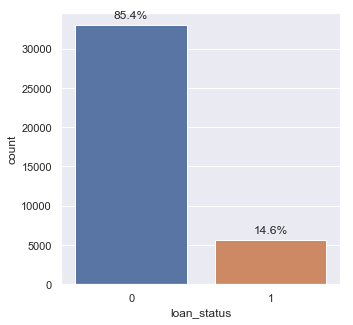

In [50]:
# Plot the variable distribution
sns.set()
plt.figure(figsize = (5,5))
g = sns.countplot(x = loan['loan_status'])

for p in g.patches:
    g.annotate('{:.1%}'.format(p.get_height()/len(loan['loan_status'])),
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [51]:
#Shape of the DataFrame after Data Cleaning Step
loan.shape

(38574, 29)

<font size='4' color='grey'> Data cleaning and manipulation stages are completed.Let's proceed with the Data Analysis </font>

## <font size='5' color='green'> Data Analysis </font> 
### <font size='4' color='green'> Univariate Analysis </font> 
    - Continuous Variables
    - Categorical Variables
### <font size='4' color='green'>Derived Metrices</font> 
    - Business Driven Metrices
    - Type Driven Metrices
    - Data Driven Metrices
### <font size='4' color='green'>Bivariate Analysis</font> 


In [52]:
#Gather the metadata on which univariate analysis to be performed
print(loan.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38574 entries, 0 to 39716
Data columns (total 29 columns):
loan_amnt                 38574 non-null int64
funded_amnt               38574 non-null int64
funded_amnt_inv           38574 non-null float64
term                      38574 non-null int64
int_rate                  38574 non-null float64
installment               38574 non-null float64
grade                     38574 non-null object
sub_grade                 38574 non-null object
emp_length                38574 non-null object
home_ownership            38574 non-null object
annual_inc                38574 non-null float64
verification_status       38574 non-null object
issue_d                   38574 non-null datetime64[ns]
loan_status               38574 non-null int64
purpose                   38574 non-null object
title                     38563 non-null object
addr_state                38574 non-null object
dti                       38574 non-null float64
delinq_2yrs       

<font size='4' color='green'> <b> 4.1 Univariate Analysis </b> </font> <br> <br>

### 1. Continuous Variable Analysis 

<font size='4' color='black'> Lets define some functions for plotting univariate continuous variables analysis w.r.t target variable : loan_status </font>

In [53]:
# function for plotting continuous variable

def univariate_cont_var_plot(df, col):
    sns.set()
    
    fig,axes = plt.subplots(1,2)
    fig.set_size_inches(18,4)
    axes[0].set_title("Distribution Plot")
    sns.distplot(df[col], ax=axes[0])
    axes[1].set_title("Box Plot")
    #sns.boxplot(x = df[col], y = df['loan_status'], ax = axes[1])
    sns.boxplot(x = df['loan_status'], y = df[col])
    plt.show()

In [54]:
# function for plotting continuous variable as bins

def univariate_cont_var_plot_bins(col,bins,labels):
    derived = loan[loan['loan_status'] == 1]
    
    derived_cut = pd.cut(derived[col], bins=bins, labels=labels)
    total = pd.cut(loan[col], bins=bins, labels=labels)
    x = (derived_cut.value_counts()/total.value_counts())*100
    ax = x.sort_values().plot.bar(rot=0, figsize=(15,4),color=sns.color_palette('husl', 16))
    ax.set_xlabel(col)
    ax.set_ylabel('% of Defaulters')
    
    
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x() + p.get_width()/2, p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
        

In [55]:
# Function to Plot % of Defaulters

def univariate_cont_var_plot_percentage(df,col):
    derived = df[df['loan_status'] == 1]
    
    derived_cut = (derived[col].value_counts()/df[col].value_counts())*100
    x = derived[col].value_counts().sort_values()
    ax = derived_cut.sort_values().plot.bar(rot=0, figsize=(15,4),color=sns.color_palette('husl', 16))
    ax.set_xlabel(col)
    ax.set_ylabel('% of Defaulters')
    
    i=0
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x() + p.get_width()/2, p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
        i = i+1

### Variable : dti 

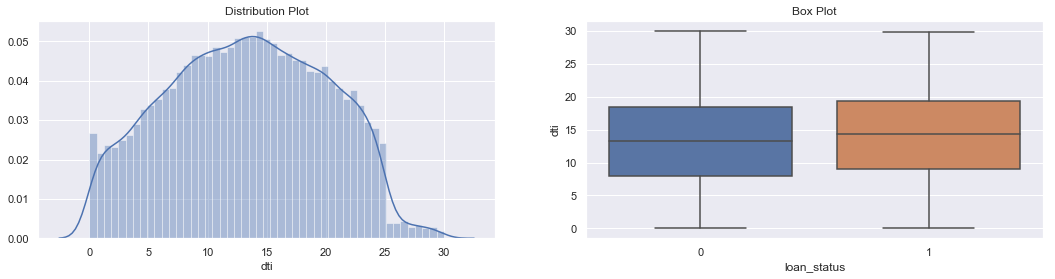

In [56]:
univariate_cont_var_plot(loan, 'dti')

In [57]:
# Summary Metrics
loan.groupby('loan_status')['dti'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,"32,947.00",13.15,6.68,0.00,7.98,13.20,18.39,29.99
1,"5,627.00",14.00,6.59,0.00,9.05,14.29,19.29,29.85


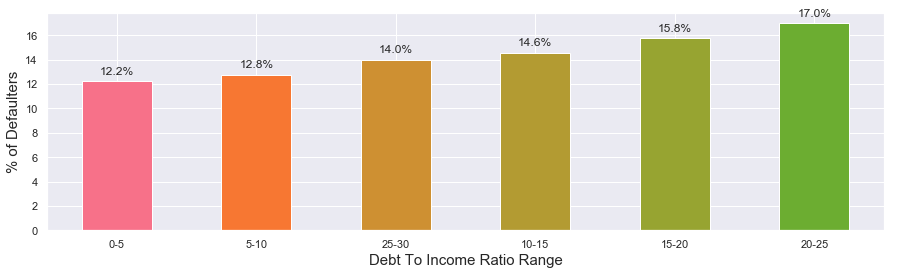

In [58]:
bins = [x for x in range(0, 31, 5)]
labels=[str(x)+'-'+str(x+5) for x in range (0, 30, 5)]

fig=univariate_cont_var_plot_bins('dti',bins,labels)
plt.xlabel("Debt To Income Ratio Range",fontsize='15')
plt.ylabel("% of Defaulters",fontsize='15')
plt.show(fig)

<b> Insights :</b>
    1. Percentage of defaulters increases when dti increases
    2. It's risky to lend money when borrowers dti is greater than 20%.

### Variable : delinq_2yrs

In [59]:
# Check the value count as percentage
loan['delinq_2yrs'].value_counts(normalize = True)*100

0    89.14
1     8.31
2     1.74
3     0.55
4     0.16
5     0.05
6     0.03
7     0.01
8     0.01
11    0.00
9     0.00
Name: delinq_2yrs, dtype: float64

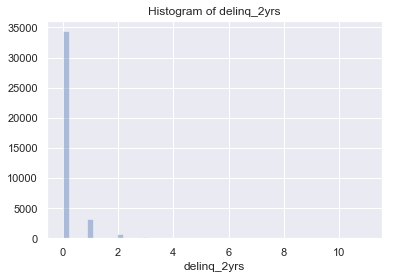

In [60]:
#Plot for frequency distribution
sns.distplot(loan.delinq_2yrs, kde=False)
plt.title('Histogram of delinq_2yrs')
plt.show();

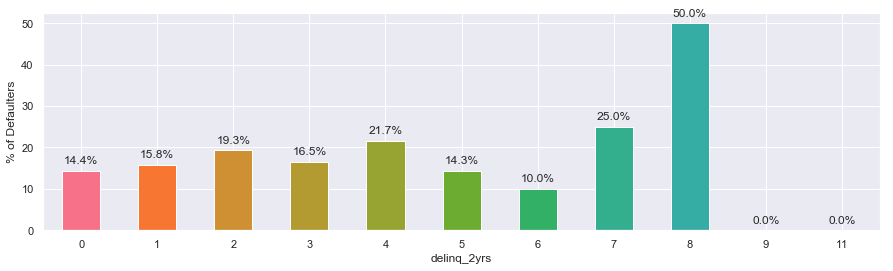

In [61]:
# Plot % of Defaulters

derived = loan[loan['loan_status'] == 1]
    
derived_cut = (derived['delinq_2yrs'].value_counts()/loan['delinq_2yrs'].value_counts())*100
derived_cut.fillna(0, inplace=True)
ax = derived_cut.sort_index().plot.bar(rot=0, figsize=(15,4),color=sns.color_palette('husl', 16))
ax.set_xlabel('delinq_2yrs')
ax.set_ylabel('% of Defaulters')
    

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x() + p.get_width()/2, p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

<b> Insights :</b>
     1. The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years values ranges between 0 and 11.
     2. There are higher chances of default if this variable is greater than 1.

### Variable : open_cc 

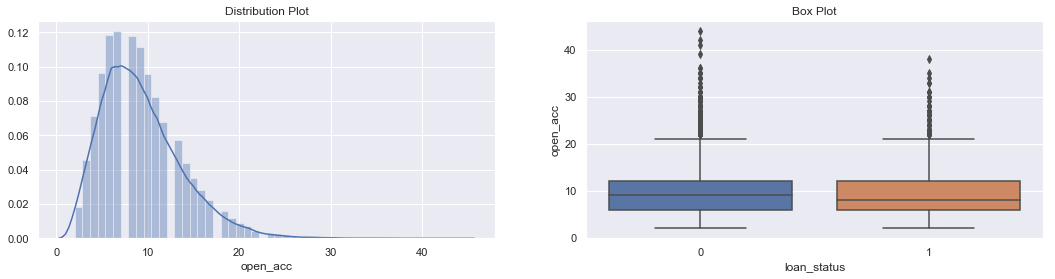

In [62]:
univariate_cont_var_plot(loan, 'open_acc')

In [63]:
loan.groupby('loan_status')['open_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,"32,947.00",9.29,4.38,2.00,6.00,9.00,12.00,44.00
1,"5,627.00",9.18,4.53,2.00,6.00,8.00,12.00,38.00


<b> Insights: </b>
    1. The median of distribution sugests that by large the borrower's seem to have 9 open credit lines.
    2. There is no significant difference in the credit lines of charged off and fully paid loans.

### Variable : pub_rec 

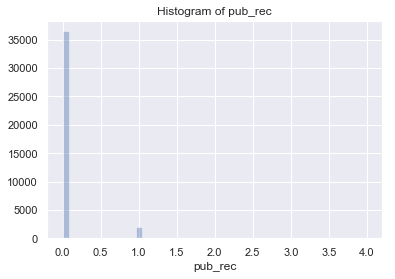

In [64]:
# Plot of pub_rec vs Frequency
sns.distplot(loan.pub_rec, kde=False)
plt.title('Histogram of pub_rec')
plt.show();

In [65]:
# Check the value count as percentage

loan['pub_rec'].value_counts(normalize = True)*100

0   94.63
1    5.22
2    0.12
3    0.02
4    0.01
Name: pub_rec, dtype: float64

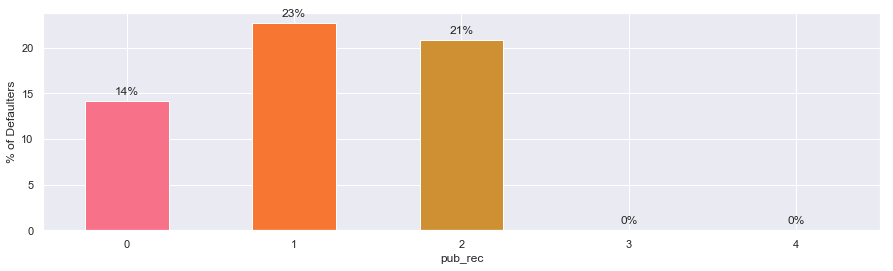

In [66]:
# Plot % of Defaulters

derived = loan[loan['loan_status'] == 1]
    
derived_cut = (derived['pub_rec'].value_counts()/loan['pub_rec'].value_counts())*100
derived_cut.fillna(0, inplace=True)
ax = derived_cut.sort_index().plot.bar(rot=0, figsize=(15,4),color=sns.color_palette('husl', 16))
ax.set_xlabel('pub_rec')
ax.set_ylabel('% of Defaulters')
    

for p in ax.patches:
    ax.annotate('{:.0f}%'.format(p.get_height()), (p.get_x() + p.get_width()/2, p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [67]:
loan.groupby('loan_status')['pub_rec'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,"32,947.00",0.05,0.23,0.00,0.00,0.00,0.00,4.00
1,"5,627.00",0.08,0.28,0.00,0.00,0.00,0.00,2.00


<b> Insights: </b>
    1. 94% have no Public derogatory records. 5% have 1 derogatory record.
    2. Having even 1 derogatory record increases the chances of Charge Off significantly.

### Variable : loan_amnt 

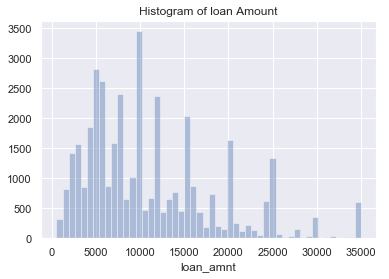

In [68]:
sns.distplot(loan.loan_amnt, kde=False)
plt.title('Histogram of loan Amount')
plt.show();

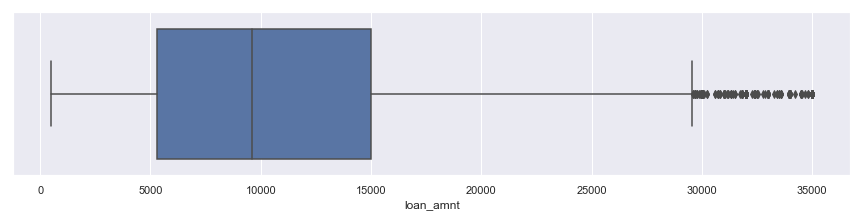

In [69]:
#Plot of frequency distribution in BoxPlot format
plt.figure(figsize=(15, 3))
sns.boxplot(x=loan['loan_amnt'], data=loan)

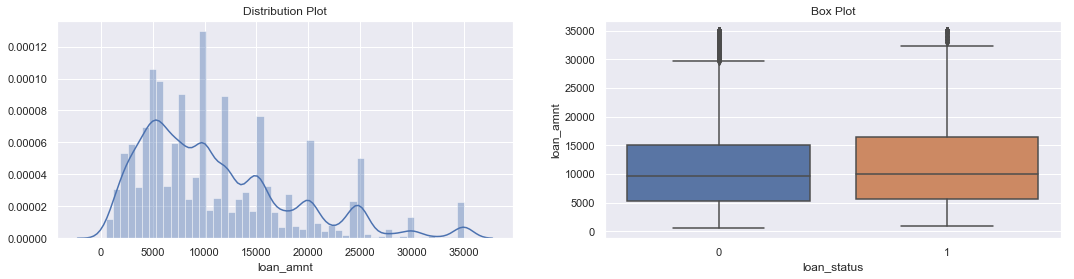

In [70]:
# Plot the variable distribution

univariate_cont_var_plot(loan, 'loan_amnt')

In [71]:
# Summary Metrics

loan.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,"32,947.00","10,866.94","7,199.72",500.00,"5,200.00","9,600.00","15,000.00","35,000.00"
1,"5,627.00","12,104.39","8,085.73",900.00,"5,600.00","10,000.00","16,500.00","35,000.00"


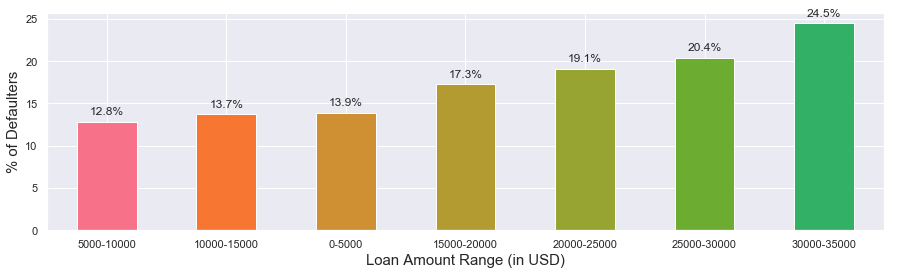

In [72]:
# Plot % of Defaulters

bins = [x for x in range(0, 36000, 5000)]
labels=[str(x)+'-'+str(x+5000) for x in range (0, 35000, 5000)]

fig=univariate_cont_var_plot_bins('loan_amnt',bins,labels)
plt.xlabel("Loan Amount Range (in USD)",fontsize='15')
plt.ylabel("% of Defaulters",fontsize='15')
plt.show(fig)

<b> Insights: </b>
    1. Overall, the applied loan amount distribution is slightly right-skewed .
    2. Most of the loans granted are below 15000 (75 percentile value)
    3. Funding amounts see a spike around each 5000 boundary.
    4. Charged off loans are shifted towards higher average loan amount request.

### Variable : Installment 

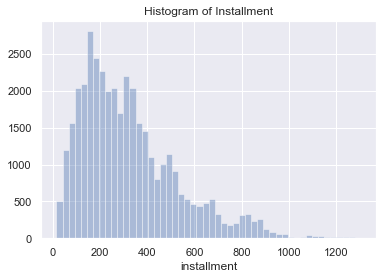

In [73]:
# Plot the frequency distribution
sns.distplot(loan.installment, kde=False)
plt.title('Histogram of Installment')
plt.show();

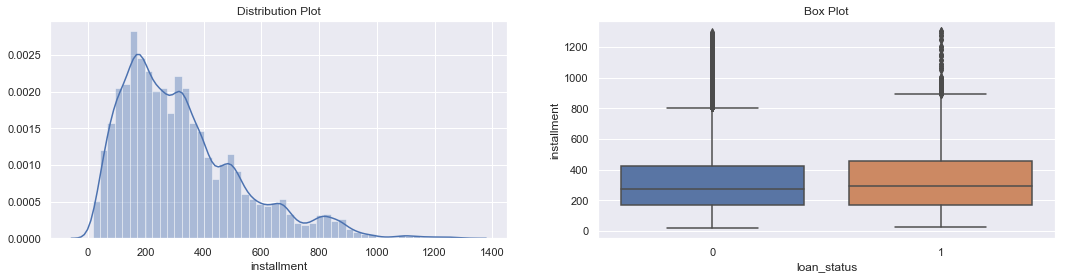

In [74]:
# Plot the variable distribution
univariate_cont_var_plot(loan,'installment')

In [75]:
# Summary Metrics

loan.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,"32,947.00",320.14,207.08,15.69,165.32,275.66,420.84,"1,295.21"
1,"5,627.00",336.18,217.05,22.79,168.56,293.87,457.84,"1,305.19"


<b> Insights: </b>
    1. Installment amount varies largely between 165 to 420 with median of 275 for Non-defaulters
    2. Charged Off loan have high installment on average compare to fully paid 

In [76]:
#Let's check shape of dataframe once
loan.shape

(38574, 29)

### Variable : annual_inc 

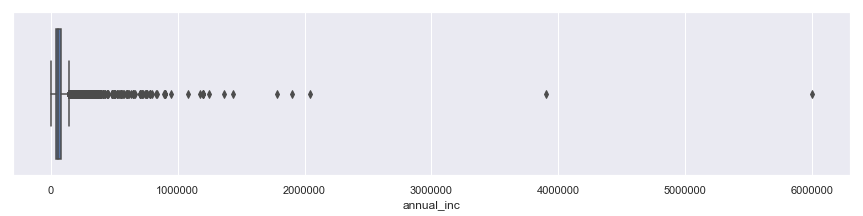

In [77]:
#Plot the frequency distribution
plt.figure(figsize=(15, 3))
sns.boxplot(x=loan['annual_inc'], data=loan)

## Handling Outliers in Annual Income 

<font size='4' color='grey'> We can easily see there are some outliers which makes the graph difficult for analysis on annual income column, lets remove the outliers </font>

In [78]:
# Summary Metrics
loan['annual_inc'].describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9,0.95,0.96,0.97,0.98,0.99,0.995,0.999])

count      38,574.00
mean       68,777.04
std        64,220.01
min         4,000.00
10%        30,000.00
25%        40,000.00
50%        58,860.28
75%        82,000.00
90%       115,000.00
95%       140,004.00
96%       150,000.00
97%       165,000.00
98%       187,000.00
99%       234,162.00
99.5%     300,000.00
99.9%     700,000.00
max     6,000,000.00
Name: annual_inc, dtype: float64

In [79]:
#Remove the outliers and remove the records above 95%
loan = loan[loan['annual_inc'] <= loan['annual_inc'].quantile(0.95)]

In [80]:
loan.annual_inc.describe()

count    36,651.00
mean     60,854.12
std      27,748.21
min       4,000.00
25%      40,000.00
50%      56,000.00
75%      77,947.00
max     140,004.00
Name: annual_inc, dtype: float64

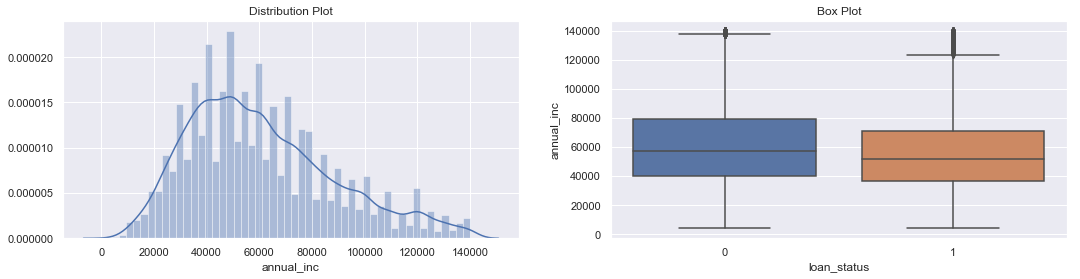

In [81]:
# Plot the variable distribution

univariate_cont_var_plot(loan, 'annual_inc')

In [82]:
# Summary Metrics
loan.groupby('loan_status')['annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,"31,233.00","61,619.54","27,874.97","4,000.00","40,000.00","57,000.00","79,000.00","140,004.00"
1,"5,418.00","56,441.76","26,582.05","4,080.00","36,297.75","51,996.00","71,287.00","140,004.00"


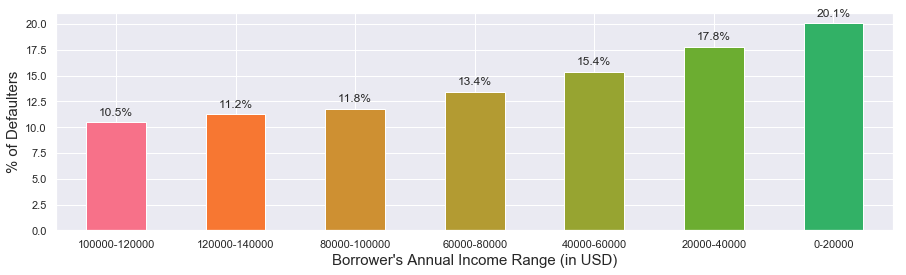

In [83]:
# Plot % of Defaulters

bins = [x for x in range(0, 150000, 20000)]
labels=[str(x)+'-'+str(x+20000) for x in range (0, 140000, 20000)]

fig=univariate_cont_var_plot_bins('annual_inc',bins,labels)
plt.xlabel("Borrower's Annual Income Range (in USD)",fontsize='15')
plt.ylabel("% of Defaulters",fontsize='15')
plt.show(fig)

In [84]:
#Convert revol_bal to floating data type
loan['revol_bal'] = loan['revol_bal'].astype(float)

<font color='grey' size='3'> Varibale : revol_bal</font> <br> <br>
Data_Dictionary: Total credit revolving balance

In [85]:
#Summarized Data on revol_bal
loan.revol_bal.describe()

count    36,651.00
mean     12,313.31
std      13,768.82
min           0.00
25%       3,553.50
50%       8,500.00
75%      16,157.50
max     149,000.00
Name: revol_bal, dtype: float64

The Revolving Balance varies from 0 to ~150000 with a median revol_bal ~9000

In [86]:
#Summarized Metrix
loan.groupby('loan_status')['revol_bal'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,"31,233.00","12,242.55","13,784.28",0.00,"3,494.00","8,414.00","16,037.00","149,000.00"
1,"5,418.00","12,721.17","13,673.46",0.00,"3,895.00","8,912.00","16,797.25","137,112.00"


<b>Insights:</b>
    - Revolving Balance of charged-off borrowers is higher compare to fully-paid borrowers. 

In [87]:
#let's check shape of dataframe before starting Categorical variable Analysis
loan.shape

(36651, 29)

<font color='grey' size='4'> 2. Univariate Analysis for Categorical Variables </font>

<font size='4' color='grey'>Columns which can be used for categorical analysis. </font>


In [88]:
#List of Categorical Variables for analysis
contegorical_variables=loan.select_dtypes(include=['object'])
contegorical_variables.columns

Index(['grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'purpose', 'title', 'addr_state'],
      dtype='object')

From the above it is clear that the following columns could be definitely used for categorical analysis

- grade
- sub_grade
- emp_length
- home_ownership
- verification_status
- term : Included this column in categorical as there are only two distinct values
- purpose
- title <br>

Also, below column could be utilized for demographic analysis

- addr_state

In [89]:
# Plot the categorical variable

def univariate_categorical_var_plot(df,col):
    ax = sns.countplot(x = col, data = df, order=df[col].value_counts().sort_values().index,palette=sns.color_palette('husl', 16))
    for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width()/2, p.get_height()),
                    ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

<font color='grey' size='3'> Variable under investigation : Issue_Year 
</font>

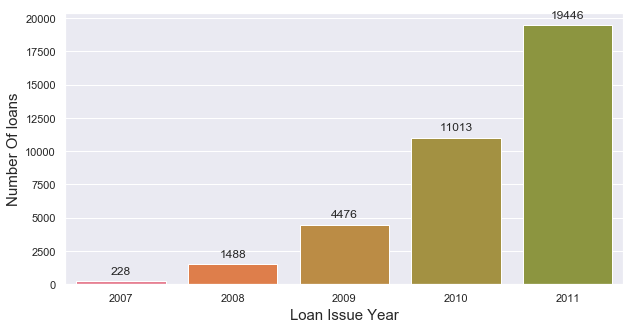

In [90]:
# Plot the variable distribution
plt.figure(figsize=(10, 5))
fig=univariate_categorical_var_plot(loan, 'issue_year')
plt.xlabel("Loan Issue Year",fontsize='15')
plt.ylabel("Number Of loans",fontsize='15')
plt.show(fig)

<font color='grey' size='3'> Variable under investigation : Grade 
</font>

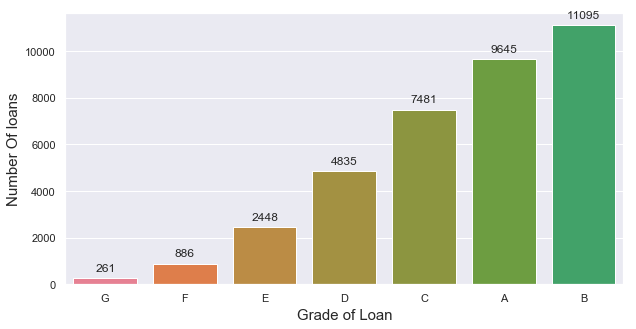

In [91]:
# Plot the variable distribution
plt.figure(figsize=(10, 5))
fig=univariate_categorical_var_plot(loan, 'grade')
plt.xlabel("Grade of Loan",fontsize='15')
plt.ylabel("Number Of loans",fontsize='15')
plt.show(fig)

<b> Insights:</b>
    1. Maximum Number of loans are disbursed in Grade B category followed by Grade A and C respectively.

<font size='3' color='grey'>Variable under investigation : Term 
</font>

The unique values in term column are,  [36 60]


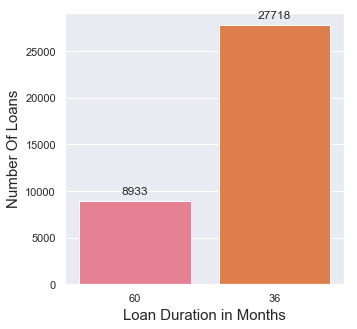

Insights:
	The most frequent term for loans is 36 months.


In [92]:
print('The unique values in term column are, ', loan['term'].unique())

# Plot the variable distribution
plt.figure(figsize=(5, 5))
fig=univariate_categorical_var_plot(loan, 'term')
plt.xlabel("Loan Duration in Months",fontsize='15')
plt.ylabel("Number Of Loans",fontsize='15')
plt.show(fig)
    
print('Insights:\n\tThe most frequent term for loans is 36 months.')

<font size='3' color='grey'> Variable under investigation : home_ownership 
</font>

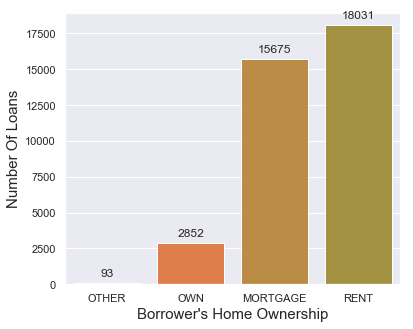

Insights:
	People who are staying in rented house are given most of the loans, 
	Followed by people staying in a mortgaged home.


In [93]:
# Distribution plot for home ownership
home_ownership = loan["home_ownership"].value_counts()

# Plot the variable distribution
plt.figure(figsize=(6, 5))
fig=univariate_categorical_var_plot(loan, 'home_ownership')
plt.xlabel("Borrower's Home Ownership",fontsize='15')
plt.ylabel("Number Of Loans",fontsize='15')
plt.show(fig)

print('Insights:\n\tPeople who are staying in rented house are given most of the loans,',
      '\n\tFollowed by people staying in a mortgaged home.')

<font color='grey' size='3'>Variable under investigation : Purpose </font>

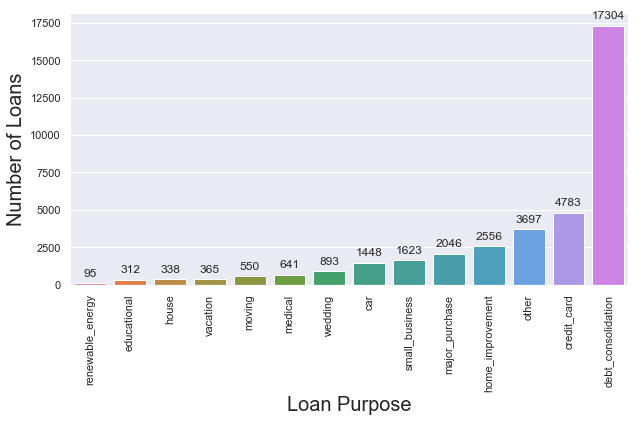

In [94]:
# Plot the variable distribution
plt.figure(figsize=(10, 5))
univariate_categorical_var_plot(loan, 'purpose')
plt.xlabel("Loan Purpose",fontsize='20')
plt.ylabel("Number of Loans",fontsize='20')
plt.xticks(rotation=90)
plt.show(fig)

<b> Insights: </b>
    1. For debt consolidation purpose, maximum number of loans are disbursed.

<font color='grey' size='3'>Variable under investigation : addr_state </font>

Number of unique address to which borrower belong:  50


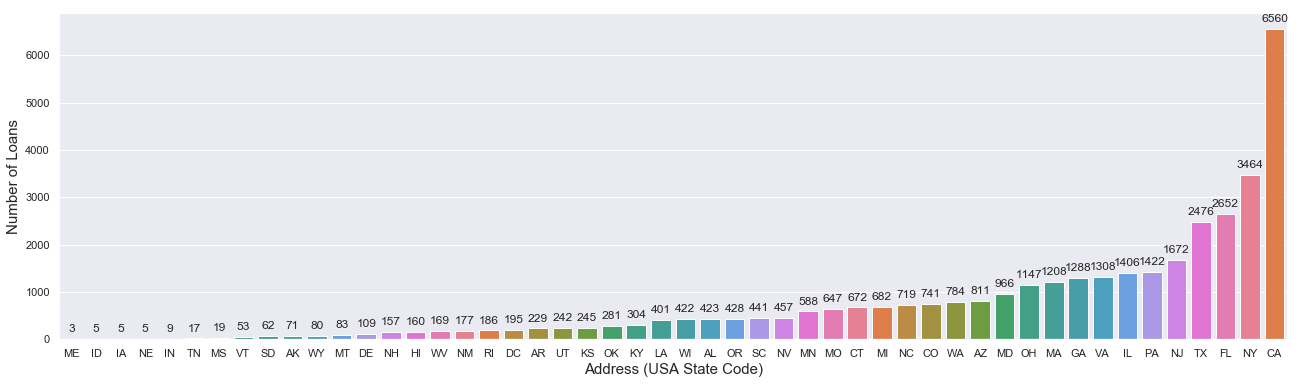

Insights:
	Maximum number of borrowers are from CA to whom loans are given



In [95]:
# Statewise Distribution plotting
print("Number of unique address to which borrower belong: ",loan.addr_state.nunique())

plt.figure(figsize=(22, 6))
fig=univariate_categorical_var_plot(loan, 'addr_state')
plt.xlabel("Address (USA State Code)",fontsize='15')
plt.ylabel("Number of Loans",fontsize='15')
plt.show(fig)

print('Insights:\n\tMaximum number of borrowers are from CA to whom loans are given\n')

 <font color='grey' size='4'> Now, lets do some analysis on percentage of charged-off customers w.r.t categorical variables </font>

In [96]:
# Plot % of Defaulters

def univariate_defaulters_plot_perc(df,col):
    derived = df[df['loan_status'] == 1]
    
    derived_cut = (derived[col].value_counts()/df[col].value_counts())*100
    x = derived[col].value_counts().sort_values()
    ax = derived_cut.sort_values().plot.bar(rot=0,color=sns.color_palette('husl', 16))
    ax.set_xlabel(col)
    ax.set_ylabel('% of Defaulters')
    
    
    for p in ax.patches:
        ax.annotate('{:.0f}%'.format(p.get_height()), (p.get_x() + p.get_width()/2, p.get_height()),
                    ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
        

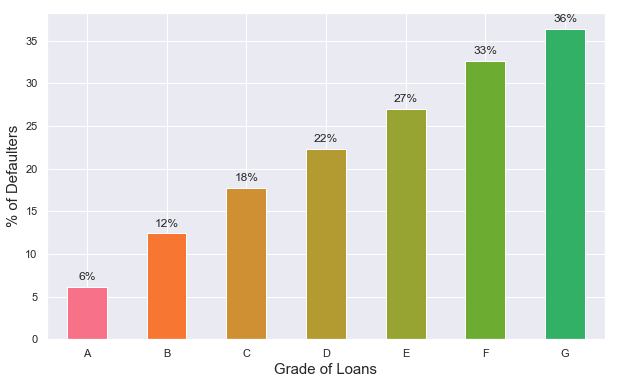

In [97]:
# Plot grade vs % of Defaulters
plt.figure(figsize=(10, 6))
fig=univariate_defaulters_plot_perc(loan, 'grade')
plt.xlabel("Grade of Loans",fontsize='15')
plt.ylabel("% of Defaulters",fontsize='15')

plt.show(fig)

<b>Insights:</b>
    1. The default rate increases as the grade of loan goes from A to G. 
    2. This is as expected because the grade is decided by Lending Club based on the riskiness of the loan. 

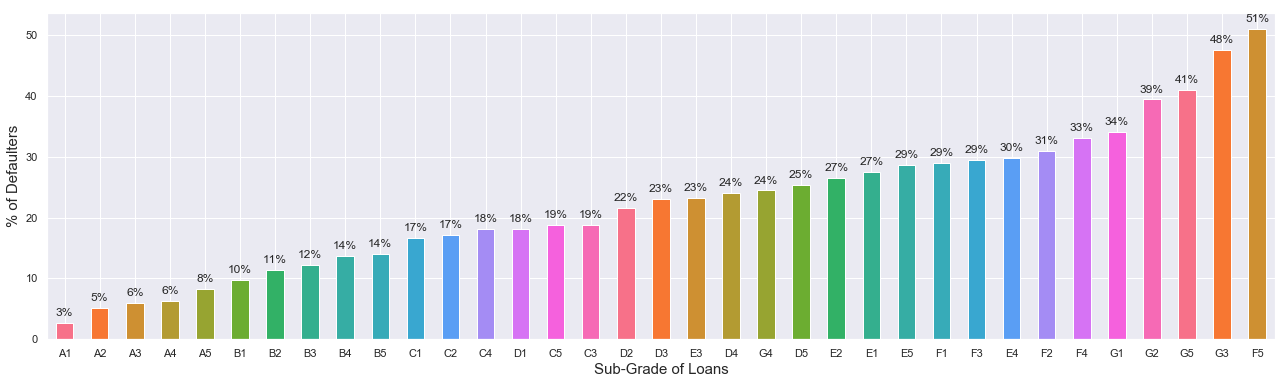

In [98]:
# sub-grade: result as expected - % of defaulters are increasing from A1 to A2 to A3 to A4 and so on.
plt.figure(figsize=(22, 6))
fig=univariate_defaulters_plot_perc(loan, 'sub_grade')
plt.xlabel("Sub-Grade of Loans",fontsize='15')
plt.ylabel("% of Defaulters",fontsize='15')

plt.show(fig)

<b> Insights </b>
    1. Percenatge of defaulters increases once we move from A1 to F5.
    2. F5 grade loans are very risky, as defaulters percenatge is highest in this category.

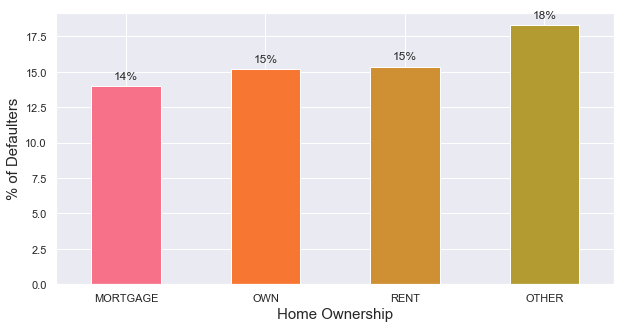

In [99]:
# Plot home ownership vs % of Defaulters

plt.figure(figsize=(10, 5))
fig=univariate_defaulters_plot_perc(loan, 'home_ownership')
plt.xlabel("Home Ownership",fontsize='15')
plt.ylabel("% of Defaulters",fontsize='15')

plt.show(fig)

<b> Insights: </b>
    1. Home_ownership isn't great indicator of loan defaults as almost all categories default percenatge is relatively close.
    2. Still, Others category have higher chances of defaulting a loan.

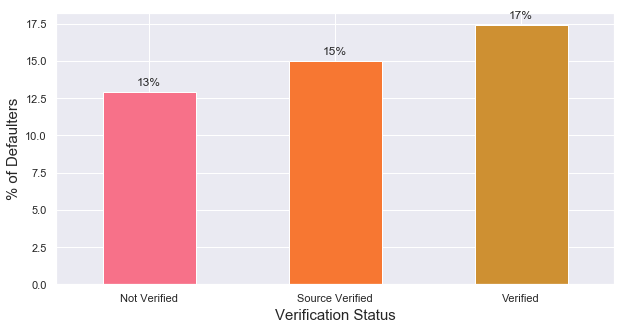

In [100]:
# Plot verification_status vs % of Defaulters

plt.figure(figsize=(10,5))
fig=univariate_defaulters_plot_perc(loan, 'verification_status')
plt.xlabel("Verification Status",fontsize='15')
plt.ylabel("% of Defaulters",fontsize='15')

plt.show(fig)

<b> Insights:</b>
    1. Default rate is highest for Verified income types and lowest for non-verified, which is quite strange as per provided dataset.

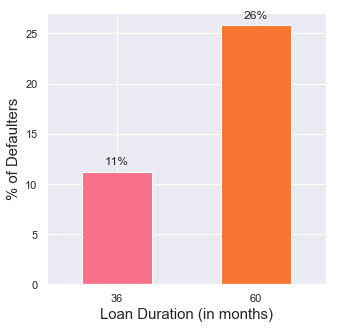

In [101]:
# Plot % of Defaulters

plt.figure(figsize=(5, 5))
fig=univariate_defaulters_plot_perc(loan, 'term')
plt.xlabel("Loan Duration (in months)",fontsize='15')
plt.ylabel("% of Defaulters",fontsize='15')

plt.show(fig)

<b> Insights :</b>
    1. 60 months loan duration applicants performance is bad compare to 36 months term applicants.

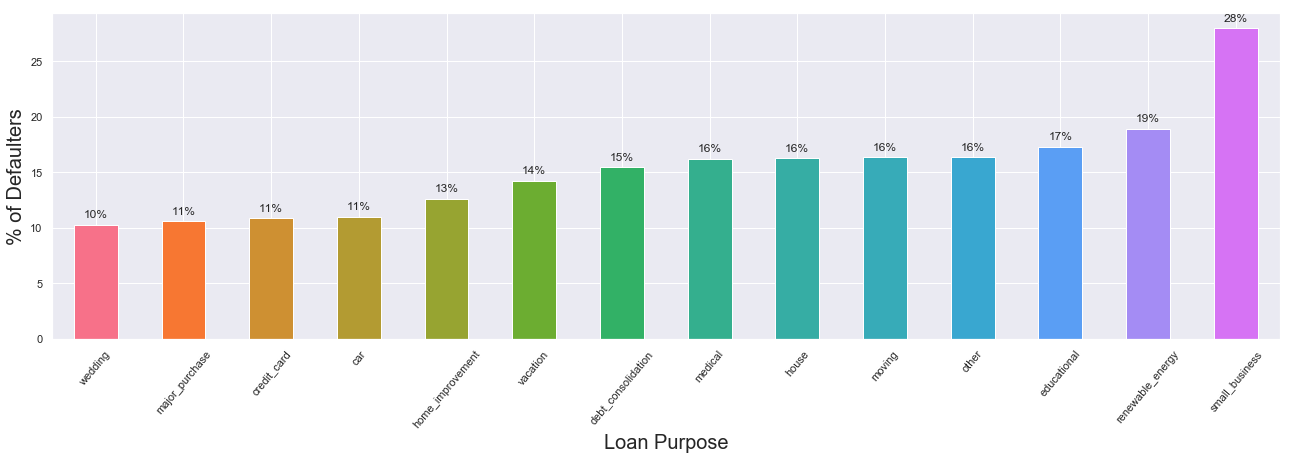

In [102]:
# Plot % of Defaulters

plt.figure(figsize=(22, 6))
fig=univariate_defaulters_plot_perc(loan, 'purpose')
plt.xlabel("Loan Purpose",fontsize='20')
plt.ylabel("% of Defaulters",fontsize='20')
plt.xticks(rotation=50)
plt.show(fig)

<b> Insights:</b>
    1. Most of the borrowers take loan to clear off some other debts (As per frequency plot)
    2. small business loans default the most, followed by renewable energy and education.

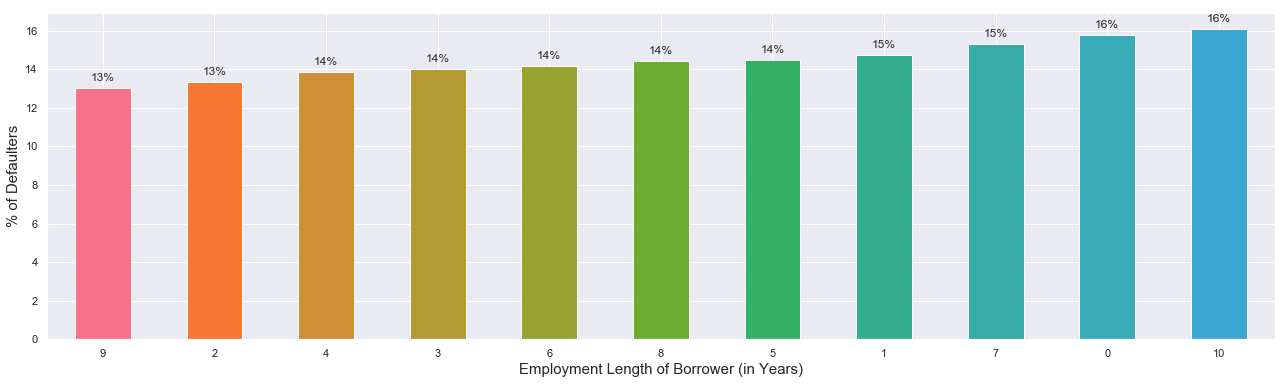

In [103]:
# Plot emp_length vs % of Defaulters
# Highest defaulters in 10+ yr emp_length.
plt.figure(figsize=(22, 6))
fig=univariate_defaulters_plot_perc(loan, 'emp_length')
plt.xlabel("Employment Length of Borrower (in Years)",fontsize='15')
plt.ylabel("% of Defaulters",fontsize='15')
plt.show(fig)

<b> Insights:</b>
    1. Borrowers having employment length greater than or equal to 10 are more likely to default a loan

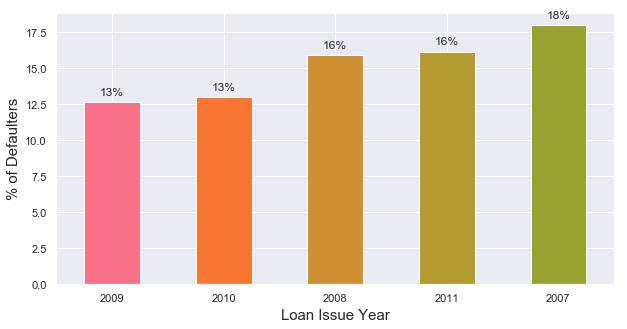

In [104]:
# comparing the default rates across years
# the default rate is reducing from 2008 till 2010 , then suddenly increased in 2011 
plt.figure(figsize=(10, 5))
fig=univariate_defaulters_plot_perc(loan,"issue_year")
plt.xlabel("Loan Issue Year",fontsize='15')
plt.ylabel("% of Defaulters",fontsize='15')

plt.show(fig)

<b> Insights:</b>
    1. As per the dataset, 2007 FYI reported as worst because % of defaulters are maximum.

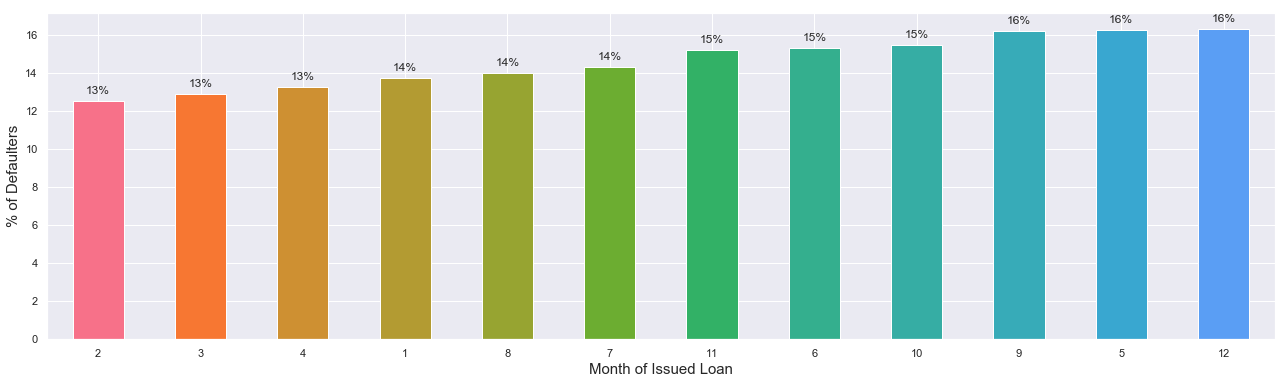

In [105]:
# Plotting default rate across months.Not much variation across months.
plt.figure(figsize=(22, 6))
fig=univariate_defaulters_plot_perc(loan,"issue_month")
plt.xlabel("Month of Issued Loan",fontsize='15')
plt.ylabel("% of Defaulters",fontsize='15')

plt.show(fig)


<b> Insights:</b>
    1. As per the dataset, borrowers are more likely to default if loan issue month is december

<font size='5' color='green'> <b> 4.2 Derived Metrices </b> </font>

<font size='3' color='grey'> To analyse how default rates vary across continous variables we can bin the variables into discrete categories.

Creating bins for the loan amount variable as small, medium, high, very high. </font>

<font color='grey' size='4'> Type Driven Metrics : loan_amnt_bin </font> <br> <br>

In [106]:
#Function to create category under loan_amnt_bin new variable
def amount_bin(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'
        
loan['loan_amnt_bin'] = loan['loan_amnt'].apply(lambda x: amount_bin(x))


In [107]:
#Check the value count under each category
loan['loan_amnt_bin'].value_counts()

medium       20016
low           7339
high          7109
very high     2187
Name: loan_amnt_bin, dtype: int64

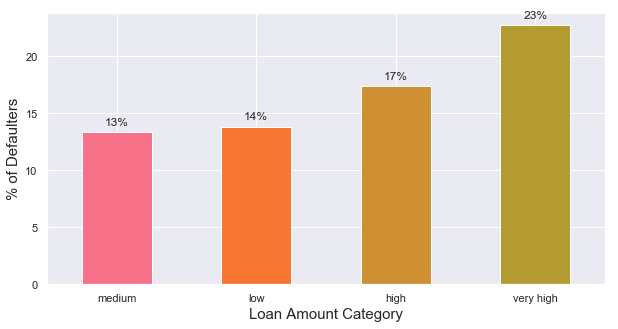

In [108]:
# comparing default rates across loan amount type
# higher the loan amount, higher the default rate
plt.figure(figsize=(10, 5))
fig=univariate_defaulters_plot_perc(loan, 'loan_amnt_bin')
plt.xlabel("Loan Amount Category",fontsize='15')
plt.ylabel("% of Defaulters",fontsize='15')

plt.show(fig)



<b> Insights: </b>
    1. When sanctioned loan amount is higher than 25000 USD, % of defaulters are very high.

<font color='grey' size='4'> Type Driven Metrics : funded_amnt_bin </font> <br> <br>

In [109]:
# #Function to create category under funded_amnt_bin new variable
def funded_amount(n):
    if n <= 5000:
        return 'low'
    elif n > 5000 and n <=15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'
    
# creating bins for funded amount
loan['funded_amnt_bin'] = loan['funded_amnt'].apply(lambda x: amount_bin(x))

In [110]:
#Check the value count under each category
loan['funded_amnt_bin'].value_counts()

medium       20463
low           7432
high          6904
very high     1852
Name: funded_amnt_bin, dtype: int64

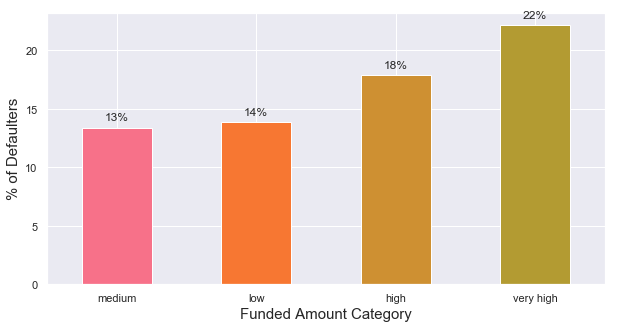

In [111]:
# Plotting funding amount vs default rate
# Default rate is HIGH for very HIGH funded amounts
plt.figure(figsize=(10, 5))
fig=univariate_defaulters_plot_perc(loan, 'funded_amnt_bin')
plt.xlabel("Funded Amount Category",fontsize='15')
plt.ylabel("% of Defaulters",fontsize='15')

plt.show(fig)

<b> Insights: </b>
    1. lending club should do more investigation before approving amount higher than 25000 USD.

### Type Driven Metrics : funded_amnt_inv_bin

In [112]:
#Function to create category under funded_amnt_inv_bin new variable
def funded_amount_inv(n):
    if n <= 5000:
        return 'low'
    elif n > 5000 and n <=15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'
    
# creating bins for funded amount
loan['funded_amnt_inv_bin'] = loan['funded_amnt_inv'].apply(lambda x: amount_bin(x))

In [113]:
#Check value count under each category
loan['funded_amnt_inv_bin'].value_counts()

medium       20275
low           9224
high          6091
very high     1061
Name: funded_amnt_inv_bin, dtype: int64

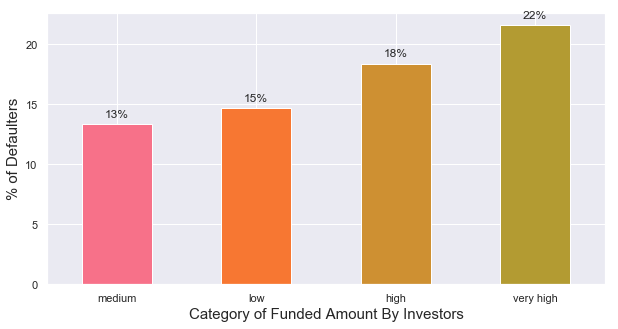

In [114]:
# Plotting funding amount invested
plt.figure(figsize=(10, 5))
fig=univariate_defaulters_plot_perc(loan, 'funded_amnt_inv_bin')
plt.xlabel("Category of Funded Amount By Investors",fontsize='15')
plt.ylabel("% of Defaulters",fontsize='15')

plt.show(fig)

<b> Insights: </b>
    1. Investor should do more investigation before approving amount higher than 25000 USD.

<font color='grey' size='4'> Type Driven Metrics : int_rate_bin </font> <br> <br>

In [115]:
# Classifying interest rate to bins low, medium, high

def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'
    
    
loan['int_rate_bin'] = loan['int_rate'].apply(lambda x: int_rate(x))

In [116]:
#Check the value count under each category
loan['int_rate_bin'].value_counts()

medium    17377
low       11821
high       7453
Name: int_rate_bin, dtype: int64

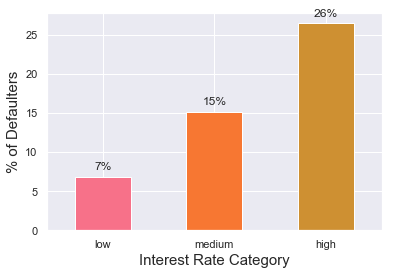

In [117]:
# Plotting interest rate bins vs % of defaulters

fig=univariate_defaulters_plot_perc(loan, 'int_rate_bin')
plt.xlabel("Interest Rate Category",fontsize='15')
plt.ylabel("% of Defaulters",fontsize='15')

plt.show(fig)

<b> Insights: </b>
    1. When Interest rate is high(greater than 15%), borrowers usually comes under defaulter list.
    2. Defaulters are increasing from low to high interest rate values
    3. Lending loans at higher interest rate is not good for loan returns on time.

<font color='grey' size='4'> Type Driven Metrics : dti_bin </font> <br> <br>

In [118]:
#Creating bins for debt to income ratio
def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'
    

loan['dti_bin'] = loan['dti'].apply(lambda x: dti(x))

In [119]:
#Check the value count under each category
loan['dti_bin'].value_counts()

medium    17693
low       11885
high       7073
Name: dti_bin, dtype: int64

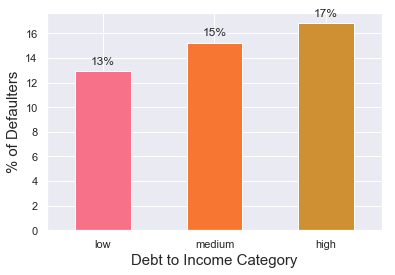

In [120]:
# Plotting debt to income ratio vs % of defaulters

fig=univariate_defaulters_plot_perc(loan, 'dti_bin')
plt.xlabel("Debt to Income Category",fontsize='15')
plt.ylabel("% of Defaulters",fontsize='15')

plt.show(fig)

<b> Insights: </b>
    1. Investors should invest more money where borrowers dti is less than 20% (i.e., below high category)
    2. Defaulters are HIGH for HIGH dti(debt to Income) ratio

<font color='grey' size='4'> Type Driven Metrics : installment_bin </font> <br> <br>

In [121]:
# creating bins for installment
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=400:
        return 'medium'
    elif n > 400 and n <=600:
        return 'high'
    else:
        return 'very high'
    
loan['installment_bin'] = loan['installment'].apply(lambda x: installment(x))

In [122]:
loan['installment_bin'].value_counts()

medium       14213
low          12833
high          6134
very high     3471
Name: installment_bin, dtype: int64

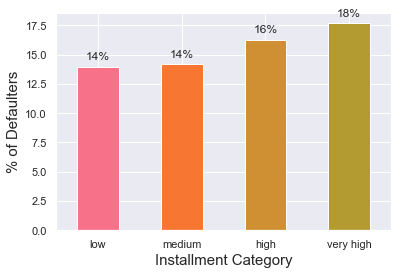

In [123]:
# Plotting installment bins vs % of defaulters

fig=univariate_defaulters_plot_perc(loan, 'installment_bin')
plt.xlabel("Installment Category",fontsize='15')
plt.ylabel("% of Defaulters",fontsize='15')

plt.show(fig)

<b> Insights: </b>
    1. When installment amount is high (> 600 USD), borrowers are more likely to default.
    2. For HIGH installments default rate is HIGH

<font color='grey' size='4'> Type Driven Metrics : annual_inc_bin </font> <br> <br>

In [124]:
# Binning the annual income
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

loan['annual_inc_bin'] = loan['annual_inc'].apply(lambda x: annual_income(x))

In [125]:
#Check the value count under each category
loan['annual_inc_bin'].value_counts()

medium    17706
low       15388
high       3557
Name: annual_inc_bin, dtype: int64

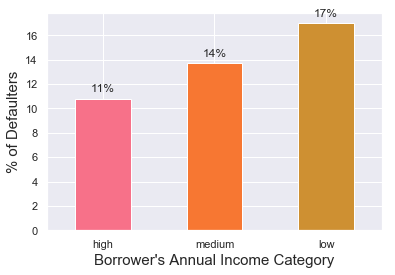

In [126]:
# annual income vs default rate

fig=univariate_defaulters_plot_perc(loan, 'annual_inc_bin')
plt.xlabel("Borrower's Annual Income Category",fontsize='15')
plt.ylabel("% of Defaulters",fontsize='15')

plt.show(fig)

<b> Insights: </b>
    1. Borrowers with low annual income(< 50000 USD Per annum) are more likely to default
    2. Lower the annual income, higher is the default rate

<font color='grey' size='4'> Type Driven Metrics : emp_length_bin </font> <br> <br>

In [127]:
# binning employment length

def emp_length(n):
    if n <= 1:
        return 'fresher'
    elif n > 1 and n <=3:
        return 'junior'
    elif n > 3 and n <=7:
        return 'senior'
    else:
        return 'expert'

loan['emp_length_bin'] = loan['emp_length'].apply(lambda x: emp_length(int(x)))

In [128]:
#Check the value count under each category
loan['emp_length_bin'].value_counts()

expert     10384
senior      9960
fresher     8382
junior      7925
Name: emp_length_bin, dtype: int64

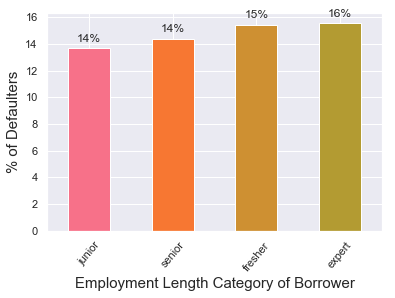

In [129]:
# highest for expert & then fresher , but not much difference.
# Doesn't seem to provide much info about impact on default rate.
fig=univariate_defaulters_plot_perc(loan, 'emp_length_bin')
plt.xlabel("Employment Length Category of Borrower",fontsize='15')
plt.ylabel("% of Defaulters",fontsize='15')
plt.xticks(rotation=50)

plt.show(fig)

<b> Insights: </b>
    1. Borrowers with 10 or more years of employment length are more likely to default.

<font size='4' color='grey'>Type Driven Metrics : income_to_loan_amount </font> <br><br>
<font size='4'>Ratio Variable : </font> Define a new cloumn loan_income_ratio which defines ratio of annual income to the loan amount of the borrower

In [130]:
# Derive income_to_loan_amount variable as the ratio  of annual income and loan amount

loan['income_to_loan_amount'] = round(loan['annual_inc'] / loan['loan_amnt'])

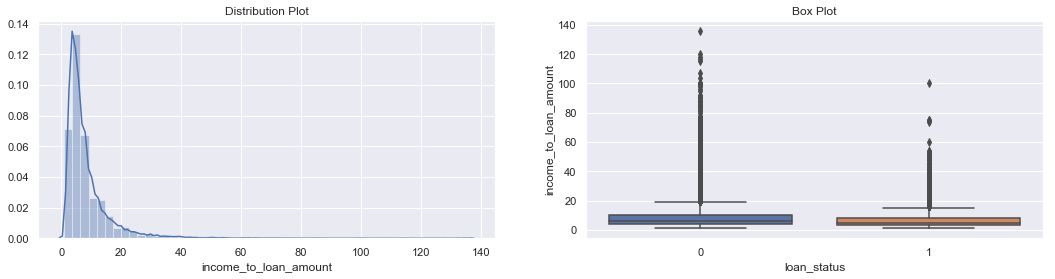

In [131]:
# Plot the variable distribution

univariate_cont_var_plot(loan, 'income_to_loan_amount')

In [132]:
# Summary Metrics
loan.groupby('loan_status')['income_to_loan_amount'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,"31,233.00",8.62,8.16,1.00,4.00,6.00,10.00,136.00
1,"5,418.00",7.15,6.74,1.00,3.00,5.00,8.00,100.00


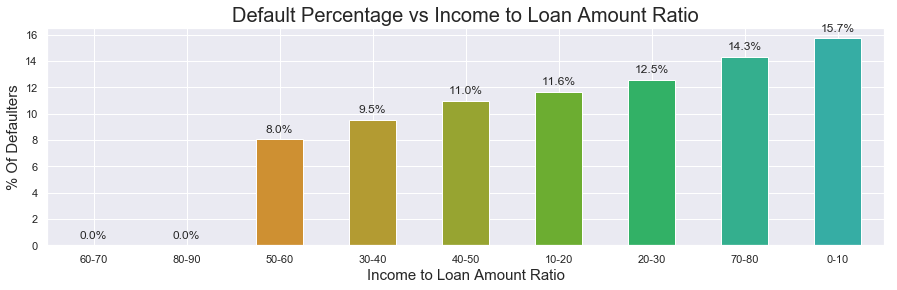

In [133]:
# Plot % of Defaulters

bins = [x for x in range(0, 91, 10)]
labels=[str(x)+'-'+str(x+10) for x in range (0, 90, 10)]

fig=univariate_cont_var_plot_bins('income_to_loan_amount',bins,labels)
plt.xlabel("Income to Loan Amount Ratio",fontsize='15')
plt.ylabel("% Of Defaulters",fontsize='15')
plt.title("Default Percentage vs Income to Loan Amount Ratio",fontsize='20')
plt.show(fig)

<b> Insights: </b>
    1. Most of the borrowers have good annual income to loan amount ratio 0 and 25.
    2. Highest number of defaulters and the highest percentage of defaulters are having annual income to loan amount ratio of 0 to 10.
    3. Higher risk of default is for borrowers with low annual income to loan amount ratio.

<font size='4' color='grey'>Business Driven Metrics : loan_status </font> <br><br>
<font size='4'>Business Driven Variable : </font> Already Defined a new cloumn loan_status which defines the main objective of business whether a borrower will be defaulter or not

In [134]:
#Let's check shape of dataframe before starting bivariate analysis
loan.shape

(36651, 38)

In [135]:
# Check the loan dataframe dataset
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,pub_rec_bankruptcies,issue_month,issue_year,earliest_cr_line_month,earliest_cr_line_year,loan_amnt_bin,funded_amnt_bin,funded_amnt_inv_bin,int_rate_bin,dti_bin,installment_bin,annual_inc_bin,emp_length_bin,income_to_loan_amount
0,5000,5000,"4,975.00",36,10.65,162.87,B,B2,10,RENT,"24,000.00",Verified,2011-12-01,0,credit_card,Computer,AZ,27.65,0,1985-01-01,3,0,"13,648.00",83.70,0.00,12,2011,1,1985,medium,medium,low,medium,high,low,low,expert,5.00
1,2500,2500,"2,500.00",60,15.27,59.83,C,C4,0,RENT,"30,000.00",Source Verified,2011-12-01,1,car,bike,GA,1.00,0,1999-04-01,3,0,"1,687.00",9.40,0.00,12,2011,4,1999,low,low,low,high,low,low,low,fresher,12.00
2,2400,2400,"2,400.00",36,15.96,84.33,C,C5,10,RENT,"12,252.00",Not Verified,2011-12-01,0,small_business,real estate business,IL,8.72,0,2001-11-01,2,0,"2,956.00",98.50,0.00,12,2011,11,2001,low,low,low,high,low,low,low,expert,5.00
3,10000,10000,"10,000.00",36,13.49,339.31,C,C1,10,RENT,"49,200.00",Source Verified,2011-12-01,0,other,personel,CA,20.00,0,1996-02-01,10,0,"5,598.00",21.00,0.00,12,2011,2,1996,medium,medium,medium,medium,medium,medium,low,expert,5.00
5,5000,5000,"5,000.00",36,7.90,156.46,A,A4,3,RENT,"36,000.00",Source Verified,2011-12-01,0,wedding,My wedding loan I promise to pay back,AZ,11.20,0,2004-11-01,9,0,"7,963.00",28.30,0.00,12,2011,11,2004,medium,medium,medium,low,medium,low,low,junior,7.00


<font size='4'> <b> Driver Variables </b> </font> <br> <br>
As per our univariate analysis, these below variables are looking interesting for bivariate analysis


- Loan Amount (loan_amnt)
- Purpose (purpose)
- Home Ownership (home_ownership)
- Issue Date (issue_d)
- Sub-Grade (sub_grade)
- Term (term)
- Annual Income (annual_inc)
- DTI (dti)
- Public Record Bankruptcies (pub_rec_bankruptcies)
- Employment Length (emp_length)

<font size='5' color='green'> <b> 4.3 Bivariate Analysis </b> </font>

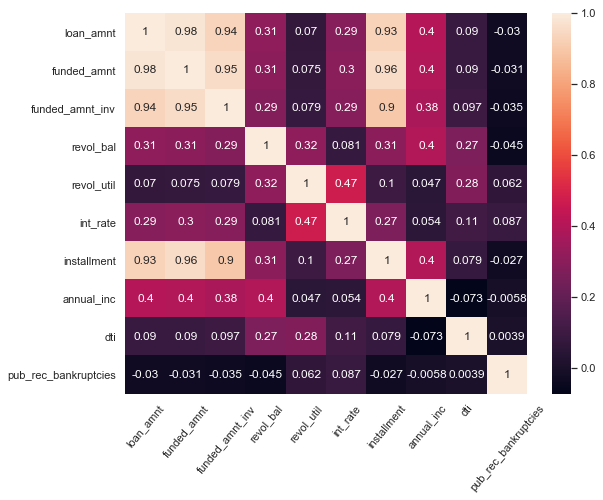

In [136]:
# Correlation Matrix

Columns = ['loan_amnt','funded_amnt','funded_amnt_inv','revol_bal','revol_util',
              'int_rate','installment','annual_inc','dti','pub_rec_bankruptcies']

correlation = loan[Columns].corr()

f,ax = plt.subplots(figsize= (9,7))

sns.heatmap(correlation,xticklabels = correlation.columns.values,yticklabels= correlation.columns.values,
            annot = True)
plt.xticks(rotation=50)
plt.show()

<b> Insights:</b>

    1. As the correlation between funded_amnt and funded_amnt_inv is not equal to 1 which signifies that Investor may charges small sum of money for as Loan Processing Fee
    2. Loan Amount and Funded Amount correlation are not Equal to 1 means actual amount applied by borrower and amount lent to them are not same.
    

In [137]:
# Function for plotting bivariate Analysis using categorical and numerical variables

def bivariate_cont_var_plot(df,col_x,col_y,hue = 'loan_status'):
    sns.barplot(x=col_x, y=col_y, hue = hue, data=df, ci=None,palette=sns.color_palette('Set2', 16))

<font size='4'> Bivariate Analysis on Loan Amount and Term over loan_status </font>

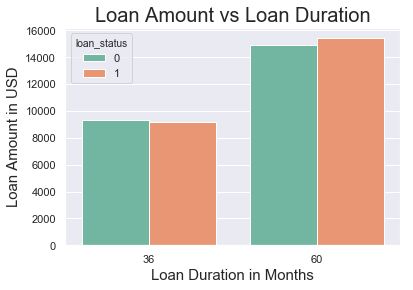

In [138]:
# Plot loan_amt and term on IsDefault

fig=bivariate_cont_var_plot(loan, 'term', 'loan_amnt')
plt.xlabel("Loan Duration in Months",fontsize='15')
plt.ylabel("Loan Amount in USD",fontsize='15')
plt.title("Loan Amount vs Loan Duration",fontsize='20')
plt.show(fig)

<b> Insights: </b>
    1. Loan takers prefer longer term for large loan amount.
    2. The assumption made in univariate analysis is now clear. Higher loan amount with longer terms has more defaulters.

<font size='4'> Bivariate Analysis on Loan Amount and Employment Length over loan_status </font>

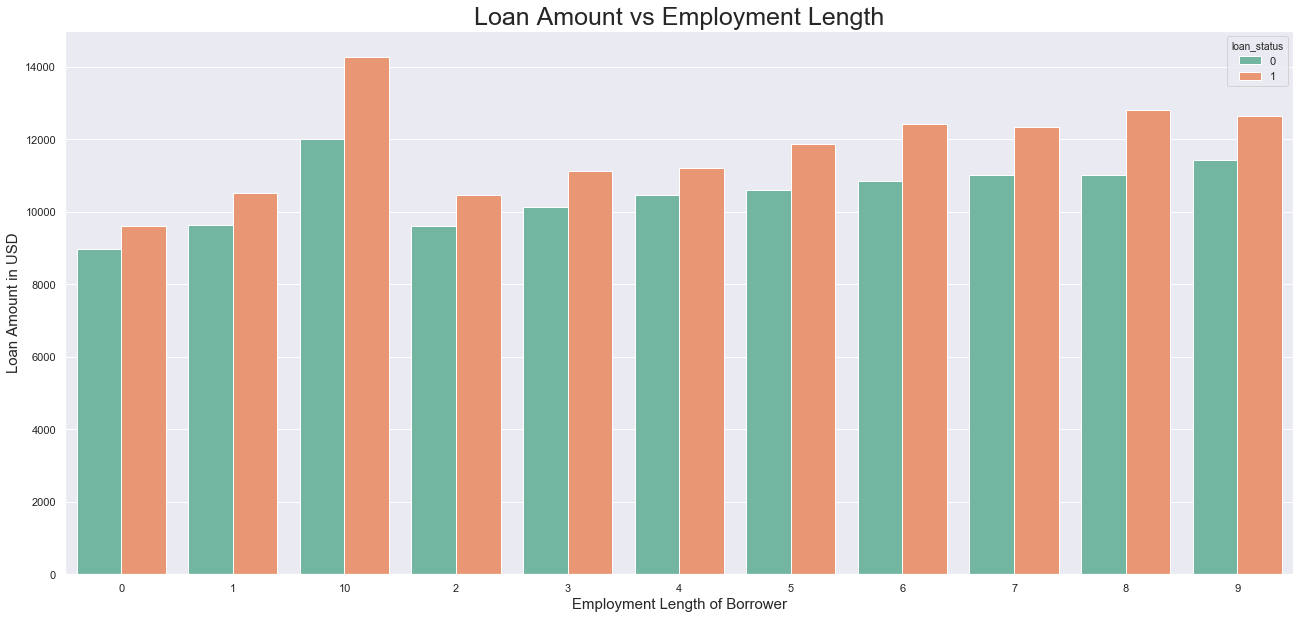

In [139]:
# Plot loan_amt and emp_length over IsDefault
plt.figure(figsize=(22,10))
fig=bivariate_cont_var_plot(loan, 'emp_length', 'loan_amnt')
plt.xlabel("Employment Length of Borrower",fontsize='15')
plt.ylabel("Loan Amount in USD",fontsize='15')
plt.title("Loan Amount vs Employment Length",fontsize='25')
plt.show(fig)

<b> Insights:</b>
    1. Large loan amounts are taken by borrowers with more than 10 years of employment length.
    2. Higher loan amount with more than 10 years of employment length has more defaulters.

## <font size='5' color='green'> Top 5 Driving Factors </font>

<font size='5'> Top 5 driven factors to consider for loan defaulters identification:</font>

1. Purpose of Loan
2. Annual Income
3. dti
4. grade
5. Interest Rate

## <font size='5' color='green'> Segmented Univariate Analysis </font>

    - After plotting and analysing the default rates across various variables, we found that the important predictor variables are purpose of the loan, interest rate, annual income, grade etc.

<b> To further conclude on driver variables , analysing the data for most popular loan purpose </b>


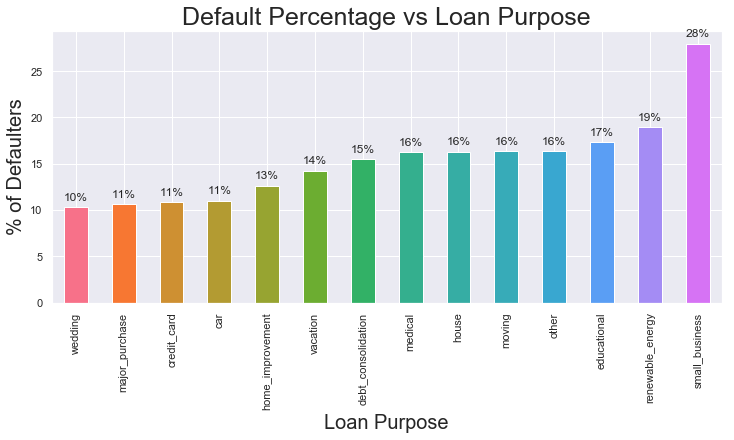

In [140]:
#Plot for Default Percentage over Loan Purpose
plt.figure(figsize=(12, 5))
fig=univariate_defaulters_plot_perc(loan,'purpose')
plt.xlabel("Loan Purpose",fontsize='20')
plt.ylabel("% of Defaulters",fontsize='20')
plt.title("Default Percentage vs Loan Purpose",fontsize='25')
plt.xticks(rotation=90)
plt.show(fig)

### <font size='4' color='green'>From the below frequency distribution plot we can see the most popular loan purpose among borrowers are : </font>
    - Debt_consolidation
    - Credit_card
    - Home_improvement
    - Major_purchase
    - Small_business 

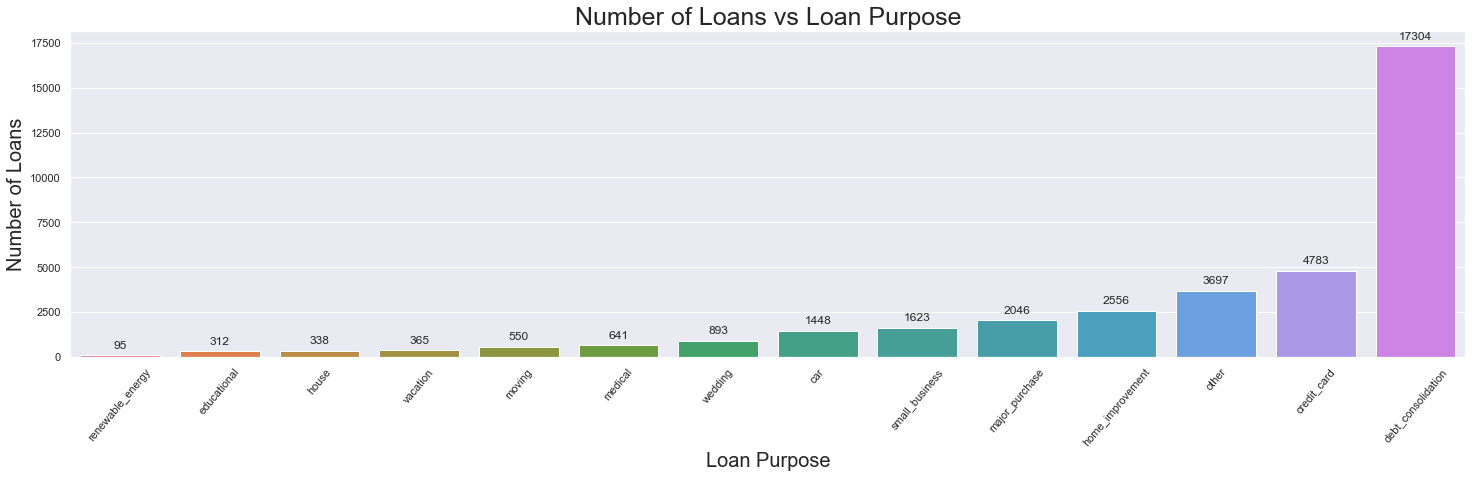

In [141]:
# Frequency distribution of loan purpose
plt.figure(figsize=(25, 6))
fig=univariate_categorical_var_plot(loan, 'purpose')
plt.xlabel("Loan Purpose",fontsize='20')
plt.ylabel("Number of Loans",fontsize='20')
plt.title("Number of Loans vs Loan Purpose",fontsize='25')
plt.xticks(rotation=50)
plt.show(fig)

<b> Insights:</b>
    1. Maximum Loans are disbursed for Debt Consolidation followed by Credit Card purposes

In [142]:
# Filtering records for above top-5 loan purpose from loan dataframe
top_5_purposes = ["debt_consolidation","credit_card","home_improvement","major_purchase","small_business"]
loan_top_5_purposes = loan[loan['purpose'].isin(top_5_purposes)]
loan_top_5_purposes['purpose'].value_counts()

debt_consolidation    17304
credit_card            4783
home_improvement       2556
major_purchase         2046
small_business         1623
Name: purpose, dtype: int64

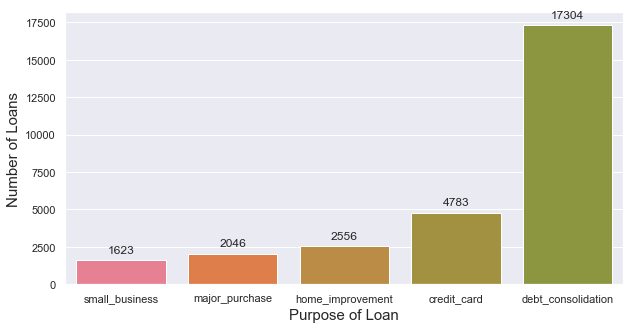

In [143]:
# Frquency distribution plot for top-5 loan purpose

plt.figure(figsize=(10, 5))
univariate_categorical_var_plot(loan_top_5_purposes, 'purpose')
plt.xlabel("Purpose of Loan",fontsize='15')
plt.ylabel("Number of Loans",fontsize='15')
plt.show(fig)

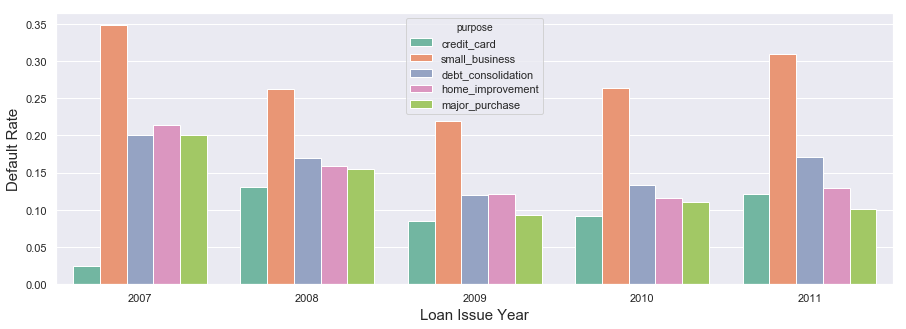

In [144]:
# comparing default rates across issue_year for top-5 loan purpose

plt.figure(figsize=(15, 5))
fig=bivariate_cont_var_plot(loan_top_5_purposes,'issue_year','loan_status',hue = 'purpose')
plt.xlabel("Loan Issue Year",fontsize='15')
plt.ylabel("Default Rate",fontsize='15')
plt.show(fig)


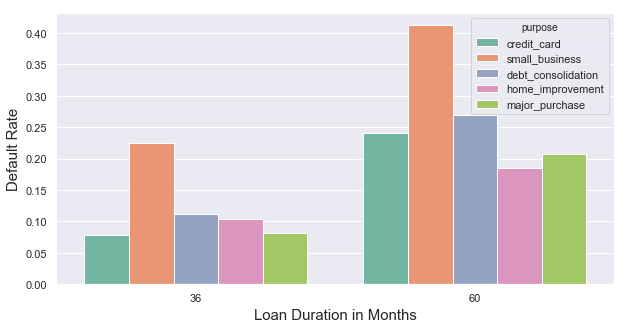

In [145]:
# comparing default rates across term for top-5 loan purpose

plt.figure(figsize=(10, 5))
fig=bivariate_cont_var_plot(loan_top_5_purposes,'term','loan_status',hue = 'purpose')
plt.xlabel("Loan Duration in Months",fontsize='15')
plt.ylabel("Default Rate",fontsize='15')
plt.show(fig)

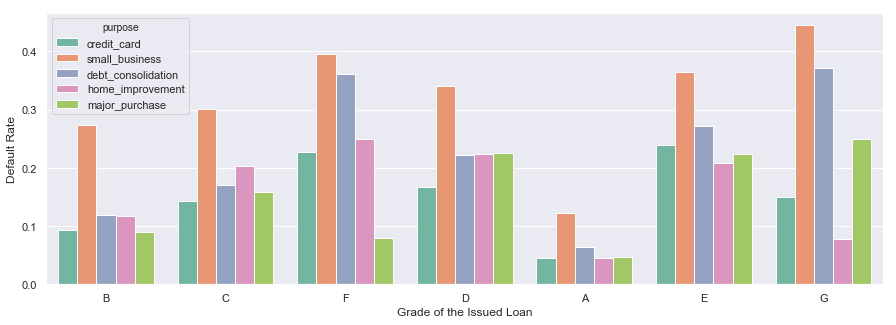

In [146]:
# comparing default rates across grade for top-5 loan purpose

plt.figure(figsize=(15, 5))
fig=bivariate_cont_var_plot(loan_top_5_purposes,'grade','loan_status',hue = 'purpose')
plt.xlabel("Grade of the Issued Loan")
plt.ylabel("Default Rate")
plt.show(fig)

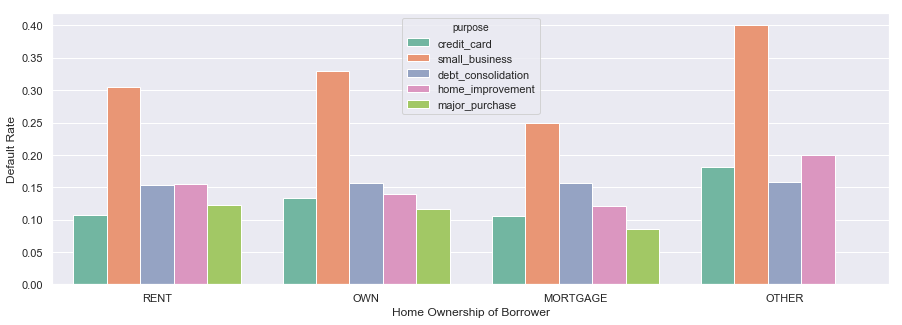

In [147]:
# comparing default rates across home_ownership for top-5 loan purpose

plt.figure(figsize=(15, 5))
fig=bivariate_cont_var_plot(loan_top_5_purposes,'home_ownership','loan_status',hue = 'purpose')
plt.xlabel("Home Ownership of Borrower")
plt.ylabel("Default Rate")
plt.show(fig)

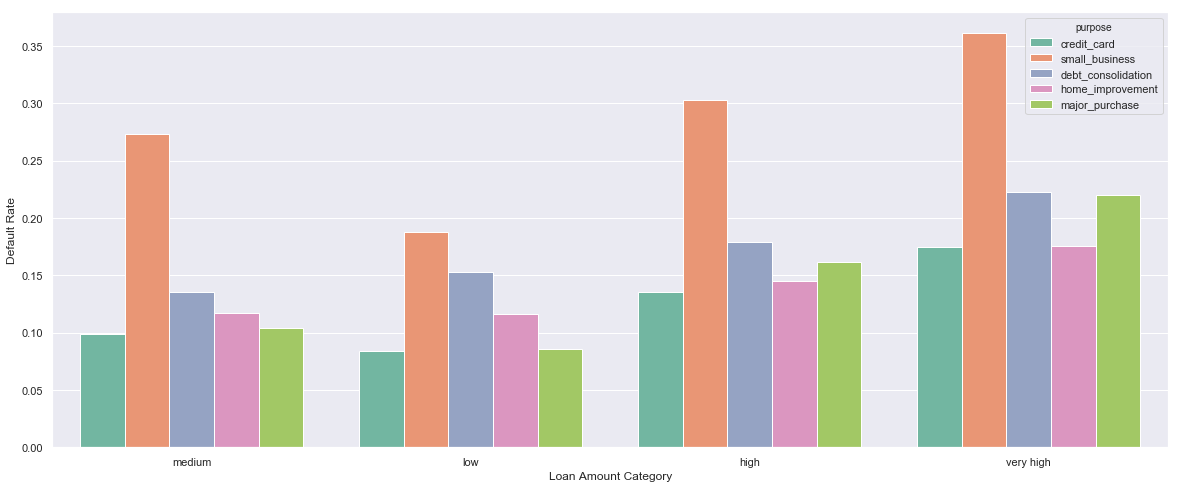

In [148]:
# comparing default rates across loan_amnt_bin for top-5 loan purpose

plt.figure(figsize=(20, 8))
fig=bivariate_cont_var_plot(loan_top_5_purposes,'loan_amnt_bin','loan_status',hue = 'purpose')
plt.xlabel("Loan Amount Category")
plt.ylabel("Default Rate")
plt.show(fig)

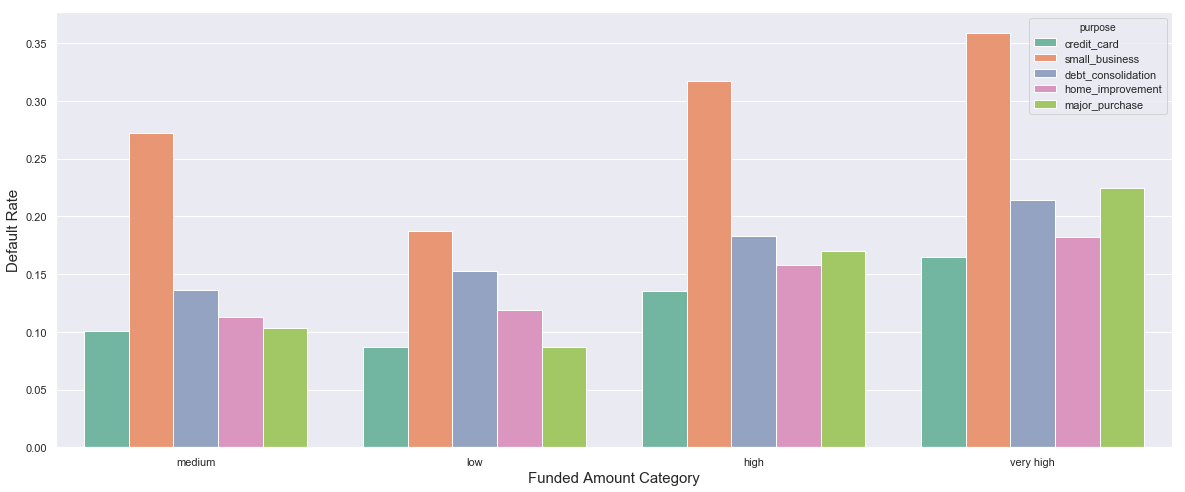

In [149]:
# comparing default rates across funded_amnt_bin for top-5 loan purpose

plt.figure(figsize=(20, 8))
fig=bivariate_cont_var_plot(loan_top_5_purposes,'funded_amnt_bin','loan_status',hue = 'purpose')
plt.xlabel("Funded Amount Category",fontsize='15')
plt.ylabel("Default Rate",fontsize='15')
plt.show(fig)

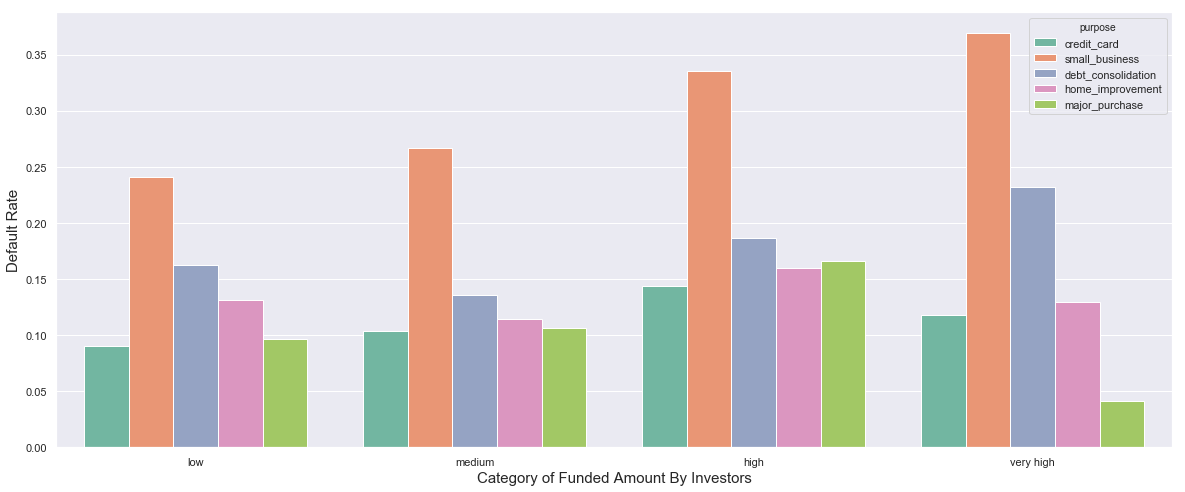

In [150]:
# comparing default rates across funded_amnt_inv_bin for top-5 loan purpose

plt.figure(figsize=(20, 8))
fig=bivariate_cont_var_plot(loan_top_5_purposes,'funded_amnt_inv_bin','loan_status',hue = 'purpose')
plt.xlabel("Category of Funded Amount By Investors",fontsize='15')
plt.ylabel("Default Rate",fontsize='15')
plt.show(fig)

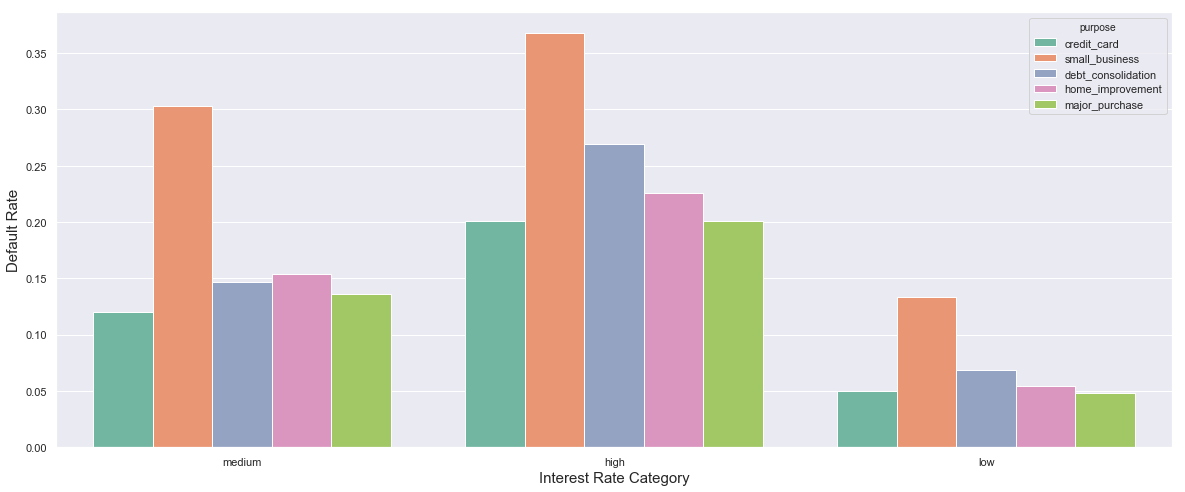

In [151]:
# comparing default rates across int_rate_bin for top-5 loan purpose

plt.figure(figsize=(20, 8))
fig=bivariate_cont_var_plot(loan_top_5_purposes,'int_rate_bin','loan_status',hue = 'purpose')
plt.xlabel("Interest Rate Category",fontsize='15')
plt.ylabel("Default Rate",fontsize='15')
plt.show(fig)

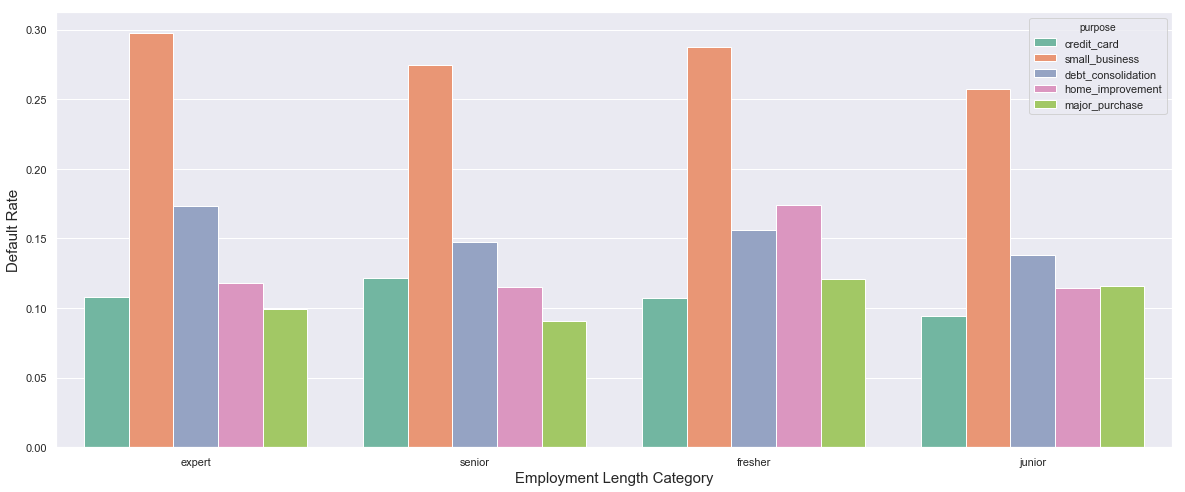

In [152]:
# comparing default rates across emp_length_bin for top-5 loan purpose

plt.figure(figsize=(20, 8))
bivariate_cont_var_plot(loan_top_5_purposes,'emp_length_bin','loan_status',hue = 'purpose')
plt.xlabel("Employment Length Category",fontsize='15')
plt.ylabel("Default Rate",fontsize='15')
plt.show(fig)

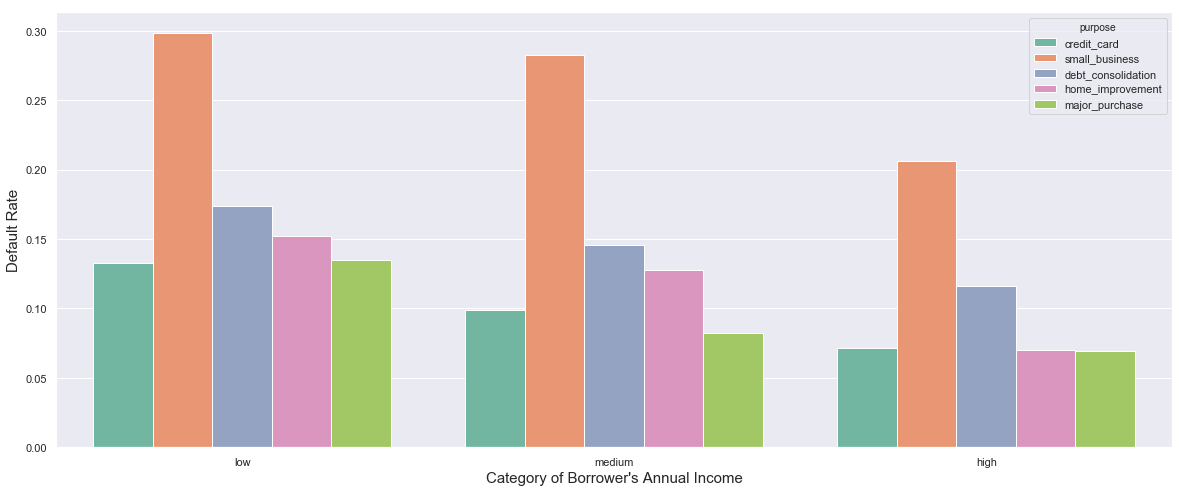

In [153]:
# comparing default rates across annual_inc_bin for top-5 loan purpose

plt.figure(figsize=(20, 8))
bivariate_cont_var_plot(loan_top_5_purposes,'annual_inc_bin','loan_status',hue = 'purpose')
plt.xlabel("Category of Borrower's Annual Income",fontsize='15')
plt.ylabel("Default Rate",fontsize='15')
plt.show(fig)

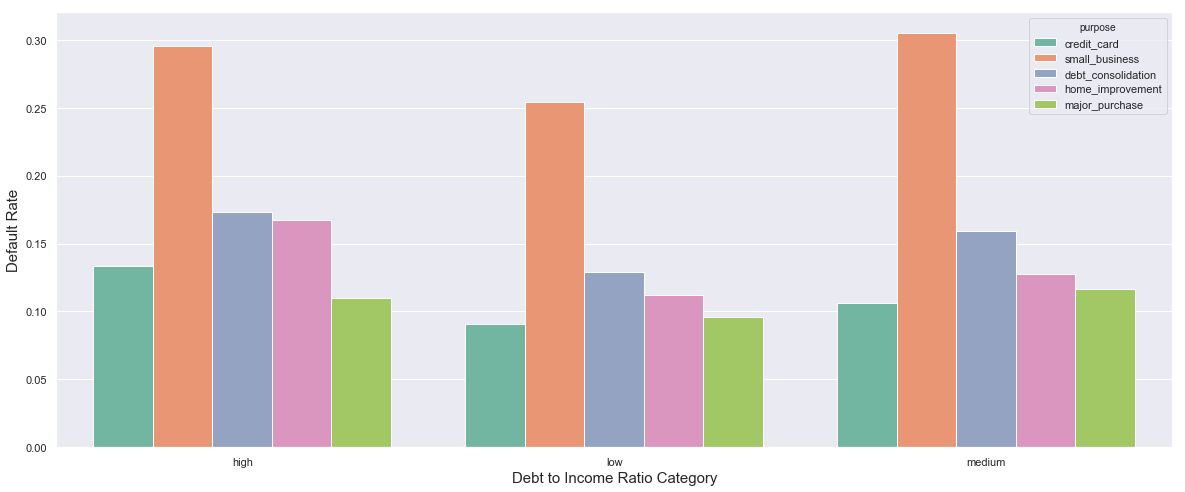

In [154]:
# comparing default rates across dti_bin for top-5 loan purpose

plt.figure(figsize=(20, 8))
bivariate_cont_var_plot(loan_top_5_purposes,'dti_bin','loan_status',hue = 'purpose')
plt.xlabel("Debt to Income Ratio Category",fontsize='15')
plt.ylabel("Default Rate",fontsize='15')
plt.show(fig)

In [155]:
#Creating list of top 5 purpose
top_5_purposes = ["debt_consolidation","credit_card","home_improvement","major_purchase","small_business"]

# Converting 'term' to string type for calculating the difference between highest & lowest values.
loan_top_5_purposes['term']=loan_top_5_purposes['term'].apply(lambda x : str(x)+"mon")

In [156]:
# Creating 5 dataframes for top_5_purposes
for p in top_5_purposes :
    globals()[p]=loan_top_5_purposes[loan_top_5_purposes['purpose']== p]
    

In [157]:
# Excluding sub_grade as its impact on target variable is same as grade
# Considering all the important driver  categorical variables except sub-grade
# since funded_amnt , funded_amnt_inv & loan_amnt are strongly positively correlated,hence considering only loan_amount among these 3 similar type of variables
cols=['grade','term',  'emp_length', 'home_ownership','verification_status','loan_amnt_bin', 
      'int_rate_bin', 'dti_bin', 'installment_bin', 
      'annual_inc_bin','emp_length_bin']

In [158]:
# calculating the distance between the highest and lowest mean values for all the categorical vars except sub_grade

def difference_high_minus_low(df,col):
    default_rate = df.groupby(col).loan_status.mean().sort_values(ascending=False)
    return (round(default_rate[0] - default_rate[-1], 2))


In [159]:
# calculating the distance between the highest and lowest mean values for all the categorical vars except sub_grade
# Storing the result in sorted dictionary
def create_dict(df) :
    d = { k: difference_high_minus_low(df,k)*100 for k in cols }
    sorted_d = dict(sorted(d.items(), key=lambda x: x[1],reverse=True))
    return(sorted_d)


### <font color='green'>  For loan purpose - Debt Consolidation : Impact of Driver variables on Default Rate </font>

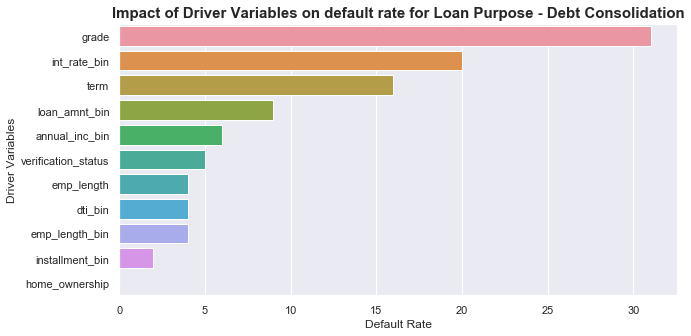

In [160]:
#Looking top-5 driver vars for loan_purpose : debt_consolidation

plt.figure(figsize=(10,5))
fig = sns.barplot(x=list(create_dict(debt_consolidation).values()), y=list(create_dict(debt_consolidation).keys()),)
plt.xlabel("Default Rate",fontsize='12')
plt.ylabel("Driver Variables",fontsize='12')
plt.title("Impact of Driver Variables on default rate for Loan Purpose - Debt Consolidation",fontsize='15', weight='bold')
plt.show(fig)

### <font color='green'> For loan purpose - Credit Card Due Amount Payment : Impact of Driver variables on Default Rate </font>

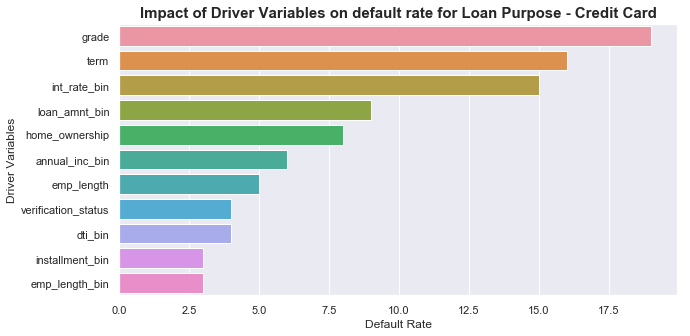

In [161]:
#Looking top-5 driver vars for loan_purpose : credit_card
plt.figure(figsize=(10,5))
fig = sns.barplot(x=list(create_dict(credit_card).values()), y=list(create_dict(credit_card).keys()),)
plt.xlabel("Default Rate",fontsize='12')
plt.ylabel("Driver Variables",fontsize='12')
plt.title("Impact of Driver Variables on default rate for Loan Purpose - Credit Card",fontsize='15', weight='bold')
plt.show(fig)

### <font color='green'>For loan purpose - Home Improvement : Impact of Driver variables on Default Rate </font>

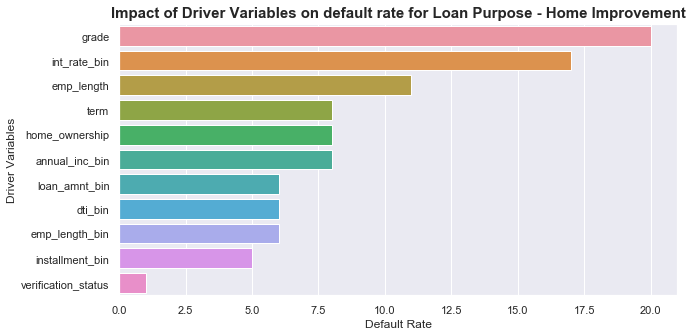

In [162]:
#Looking top-5 driver vars for loan_purpose : home_improvement
plt.figure(figsize=(10, 5))
fig = sns.barplot(x=list(create_dict(home_improvement).values()), y=list(create_dict(home_improvement).keys()),)
plt.xlabel("Default Rate",fontsize='12')
plt.ylabel("Driver Variables",fontsize='12')
plt.title("Impact of Driver Variables on default rate for Loan Purpose - Home Improvement",fontsize='15', weight='bold')
plt.show(fig)

### <font color='green'>For loan purpose - Major Purchase : Impact of Driver variables on Default Rate </font>

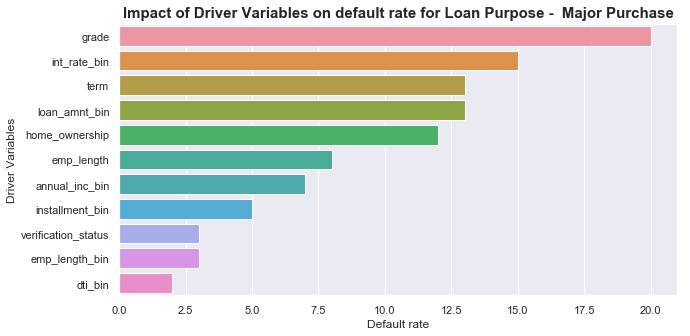

In [163]:
#Looking top-5 driver vars for loan_purpose : major_purchase
plt.figure(figsize=(10,5))
fig = sns.barplot(x=list(create_dict(major_purchase).values()), y=list(create_dict(major_purchase).keys()),)
plt.xlabel("Default rate",fontsize='12')
plt.ylabel("Driver Variables",fontsize='12')
plt.title("Impact of Driver Variables on default rate for Loan Purpose -  Major Purchase",fontsize='15', weight='bold')
plt.show(fig)

### <font color='green'> Driver variables level of Impact on Default Rate when loan purpose is for Small Business </font>

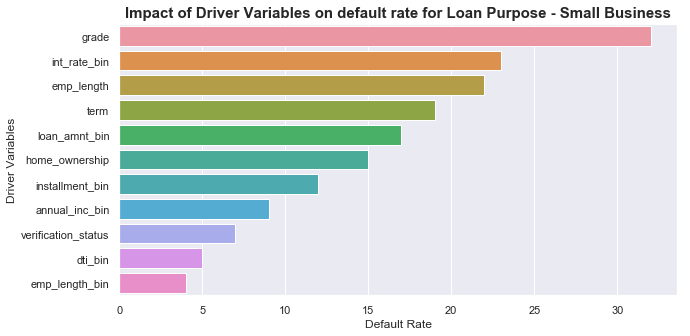

In [164]:
#Looking top-5 driver vars for loan_purpose : small_business
plt.figure(figsize=(10,5))
fig = sns.barplot(x=list(create_dict(small_business).values()), y=list(create_dict(small_business).keys()),)
plt.xlabel("Default Rate",fontsize='12')
plt.ylabel("Driver Variables",fontsize='12')
plt.title("Impact of Driver Variables on default rate for Loan Purpose - Small Business",fontsize='15', weight='bold')
plt.show(fig)

<font size='30' color='orange'> Thank You !!!! </font>